# Prueba Banistmo: Prediccion de aceptacion de Opciones de Pago

In [59]:
# !pip install numpy==1.20.3
# !pip install pandas==1.2.4
# !pip install yellowbrick==1.3.post1
# !pip install scikit-learn==0.24.2
# !pip install plotnine==0.8.0

In [60]:
import os

if not os.path.exists("data"):
    print("El directorio de data ha sido creado.")
    os.mkdir("data")
if not os.path.exists("fig"):
    print("El directorio de fig ha sido creado.")
    os.mkdir("fig")
    os.mkdir("fig/profundiza")

In [61]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from plotnine import * 

# semilla para garantizar la reproducibildiad del código
seed = 20210610


pd.set_option('display.max_columns', None)

# Specify the folder containing the CSV files
folder_path = r'C:\Users\franc\Desktop\Gerencia cientifico datos Banistmo\Prueba Analitica\Files'

files = []

# Iterate over all files in the folder
for file_name in os.listdir(folder_path):
    # Check if the file has a CSV extension
    if file_name.endswith('.csv'):
        # Create a full path to the file
        file_path = os.path.join(folder_path, file_name)
        files.append(file_path)

## Análisis exploratorio

In [62]:
files

['C:\\Users\\franc\\Desktop\\Gerencia cientifico datos Banistmo\\Prueba Analitica\\Files\\prueba_op_base_pivot_var_rpta_alt_enmascarado_oot.csv',
 'C:\\Users\\franc\\Desktop\\Gerencia cientifico datos Banistmo\\Prueba Analitica\\Files\\prueba_op_base_pivot_var_rpta_alt_enmascarado_trtest.csv',
 'C:\\Users\\franc\\Desktop\\Gerencia cientifico datos Banistmo\\Prueba Analitica\\Files\\prueba_op_maestra_cuotas_pagos_mes_hist_enmascarado_completa.csv',
 'C:\\Users\\franc\\Desktop\\Gerencia cientifico datos Banistmo\\Prueba Analitica\\Files\\prueba_op_master_customer_data_enmascarado_completa.csv',
 'C:\\Users\\franc\\Desktop\\Gerencia cientifico datos Banistmo\\Prueba Analitica\\Files\\prueba_op_probabilidad_oblig_base_hist_enmascarado_completa.csv',
 'C:\\Users\\franc\\Desktop\\Gerencia cientifico datos Banistmo\\Prueba Analitica\\Files\\sample_submission.csv']

In [63]:
df1 = pd.read_csv(files[0])
df2 = pd.read_csv(files[1])
#df3 = pd.read_csv(files[2])
#df4 = pd.read_csv(files[3])
df5 = pd.read_csv(files[4])
#df6 = pd.read_csv(files[5])

In [64]:
#MODELO A VALIDAR PARA ENERO 2024
print(files[0].split('\\')[-1])
df1#[df1['nit_enmascarado']==391362]

prueba_op_base_pivot_var_rpta_alt_enmascarado_oot.csv


,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt
0,257335,444821,635511,202401
1,59584,350400,730364,202401
2,397604,973821,106521,202401
3,368086,382995,696856,202401
4,255009,434238,645924,202401
...,...,...,...,...
112544,316499,14503,1074624,202401
112545,254311,30479,1013957,202401
112546,483193,13732,1006779,202401
112547,293824,22004,1062743,202401


In [65]:
#MODELO PARA ENTRENAMIENTO 
print(files[1].split('\\')[-1])
df2[(df2['nit_enmascarado']==391362)  & (df2['num_oblig_enmascarado']==569234) #& (df2['num_oblig_orig_enmascarado']==511108)
]

prueba_op_base_pivot_var_rpta_alt_enmascarado_trtest.csv


,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt,tipo_var_rpta_alt,banca,segmento,producto,producto_cons,aplicativo,min_mora,max_mora,dias_mora_fin,rango_mora,vlr_obligacion,vlr_vencido,saldo_capital,endeudamiento,desc_alternativa1,desc_alternativa2,desc_alternativa3,cant_alter_posibles,alter_posible1_2,alter_posible2_2,alter_posible3_2,cant_gestiones,cant_gestiones_binario,rpc,promesas_cumplidas,cant_promesas_cumplidas_binario,cant_acuerdo,cant_acuerdo_binario,descripcion_ranking_mejor_ult,descripcion_ranking_post_ult,marca_alt_rank,marca_alt_apli,valor_cuota_mes,pago_cuota,porc_pago_cuota,pago_mes,porc_pago_mes,pagos_tanque,marca_debito_mora,alternativa_aplicada_agr,marca_agrupada_rgo,marca_pago,marca_alternativa,marca_alternativa_orig
209926,391362,511108,569234,202309,0,e_cero_tipo_2,Independientes,Micropyme,ROTATIVOS,Rotativos,L,51,79,79,b.31-90,5659258.0,546969.0,5079259.0,41569454.0,Combo reestructuracion,Prórroga reestructuración,Reestructuración novacion,3,CON24,CON26,CON22,118.0,1,1.0,0,0,0.0,0,NO ACEPTA ACUERDO,N.A,No acepta acuerdo,NO,545819.0,0.0,0.0,0.0,NaN,Sin pago,NO,NaN,NaN,Sin pago,N.A,N.A
210707,391362,511108,569234,202310,1,a_uno_tipo_1,Independientes,Micropyme,ROTATIVOS,Rotativos,L,79,81,0,b.31-90,5667956.0,547100.0,5079259.0,41630418.0,Combo reestructuracion,Prórroga reestructuración,Reestructuración novacion,3,CON24,CON26,CON22,6.0,1,1.0,0,0,0.0,0,ACEPTA ALTERNATIVA,CLIENTE AL DIA,Acepta alternativa,SI,547100.0,0.0,0.0,0.0,NaN,Sin pago,NO,COMBO,REESTRUCTURACIÓN,Sin pago,Acepta Alternativa,Acepta Alternativa
210709,391362,511108,569234,202308,0,e_cero_tipo_2,Independientes,Micropyme,ROTATIVOS,Rotativos,L,18,48,48,a.1-30,5520231.0,363934.0,5079259.0,40622953.0,Combo modificación,Prórroga modificación,Modificación novacion,3,CON23,CON25,CON21,102.0,1,1.0,0,0,0.0,0,NO ACEPTA ACUERDO,NO CONTESTA,No acepta acuerdo,NO,363570.0,0.0,0.0,0.0,NaN,Sin pago,NO,NaN,NaN,Sin pago,N.A,N.A


In [66]:
df2['key'] = df2['nit_enmascarado'].astype(str) + '-' +  df2['num_oblig_enmascarado'].astype(str) + '-' + df2['fecha_var_rpta_alt'].astype(str)
df2

,nit_enmascarado,num_oblig_orig_enmascarado,num_oblig_enmascarado,fecha_var_rpta_alt,var_rpta_alt,tipo_var_rpta_alt,banca,segmento,producto,producto_cons,aplicativo,min_mora,max_mora,dias_mora_fin,rango_mora,vlr_obligacion,vlr_vencido,saldo_capital,endeudamiento,desc_alternativa1,desc_alternativa2,desc_alternativa3,cant_alter_posibles,alter_posible1_2,alter_posible2_2,alter_posible3_2,cant_gestiones,cant_gestiones_binario,rpc,promesas_cumplidas,cant_promesas_cumplidas_binario,cant_acuerdo,cant_acuerdo_binario,descripcion_ranking_mejor_ult,descripcion_ranking_post_ult,marca_alt_rank,marca_alt_apli,valor_cuota_mes,pago_cuota,porc_pago_cuota,pago_mes,porc_pago_mes,pagos_tanque,marca_debito_mora,alternativa_aplicada_agr,marca_agrupada_rgo,marca_pago,marca_alternativa,marca_alternativa_orig,key
0,630611,219718,863073,202308,1,a_uno_tipo_1,Banca Personas,Personal,TARJETA DE CREDITO,Tarjeta de Credito,V,46,71,71,b.31-90,6056996.0,1000259.0,5808115.68,12134572.0,Reestructuración novacion,Sin alivio,Sin alivio,1,CON22,NaN,NaN,46.0,1,1.0,0,0,0.0,0,ACEPTA ALTERNATIVA,CLIENTE AL DIA,Acepta alternativa,SI,1047805.49,100000.00,0.095438,0.00,0.000000,Sin pago,NO,CONSOLIDACION,REESTRUCTURACIÓN,Sin pago,Acepta Alternativa,Acepta Alternativa,630611-863073-202308
1,59412,789567,290775,202312,1,a_uno_tipo_1,Banca Personas,Personal,LIBRE INVERSION,Libre Inversion,L,16,24,0,a.1-30,9877235.0,443638.0,9451816.00,15479703.0,Prorroga más Ampliación de plazo,Prorroga,Consolidación de pasivos,2,CON02,NaN,CON03,10.0,1,1.0,0,0,0.0,0,ACEPTA ALTERNATIVA,NO ACEPTA ACUERDO,Acepta alternativa,SI,443837.00,0.00,0.000000,0.00,NaN,Sin pago,NO,PRORROGA,MANTENIMIENTO,Sin pago,Acepta Alternativa,Acepta Alternativa,59412-290775-202312
2,277595,1045909,34433,202312,1,b_uno_tipo_2,Banca Personas,Personal,LIBRE INVERSION,Libre Inversion,L,36,65,65,b.31-90,79487960.0,7650063.0,75144222.95,95148044.0,Combo modificación,Prórroga modificación,Modificación novacion,3,CON23,CON25,CON21,50.0,1,0.0,0,0,0.0,0,PLAN DE COMPROMISO CUMPLIDO,ACEPTA ALTERNATIVA,Cliente compromiso de pago,NO,5122226.00,0.00,0.000000,0.00,NaN,Sin pago,NO,NaN,NaN,Sin pago,Acepta Alternativa,Acepta Alternativa,277595-34433-202312
3,26897,585786,494556,202311,1,a_uno_tipo_1,Banca Personas,Personal,ROTATIVOS,Rotativos,L,18,40,0,a.1-30,4022153.0,266898.0,3785620.00,47499162.0,Prorroga más Ampliación de plazo,Prorroga,Consolidación de pasivos,2,CON02,NaN,CON03,12.0,1,1.0,0,0,4.0,1,PLAN DE PAGO,ACEPTA ALTERNATIVA,Cliente compromiso de pago,SI,266898.00,11241.00,0.042117,4090.00,0.015324,Con pago,NO,PRORROGA,MANTENIMIENTO,Pago parcial,Acepta Alternativa,Acepta Alternativa,26897-494556-202311
4,24588,1061389,18953,202311,1,b_uno_tipo_2,Banca Personas,Personal plus,ROTATIVOS,Rotativos,L,18,32,32,a.1-30,822626.0,43471.0,787131.00,241003241.0,Combo reestructuracion,Prórroga reestructuración,Reestructuración novacion,3,CON24,CON26,CON22,10.0,1,1.0,0,0,0.0,0,ACEPTA ALTERNATIVA,NO CONTESTA,Acepta alternativa,NO,43492.00,0.00,0.000000,0.00,0.000000,Sin pago,NO,CONSOLIDACION,REESTRUCTURACIÓN,Sin pago,Acepta Alternativa,Acepta Alternativa,24588-18953-202311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568246,271724,394522,674065,202308,0,e_cero_tipo_2,Banca Personas,Personal plus,TARJETA DE CREDITO,Tarjeta de Credito,K,29,57,57,a.1-30,5986670.0,1832292.0,3143472.00,63276048.0,Ampliación de plazo-MO,Ampliación 360- MO,Sin alivio,2,TDC12,TDC14,NaN,54.0,1,1.0,0,0,2.0,1,PLAN DE PAGO,MENSAJE INFORMATIVO - SIN CONTACTO,Cliente compromiso de pago,NO,1656602.80,0.00,0.000000,0.00,NaN,Sin pago,NO,NaN,NaN,Sin pago,N.A,N.A,271724-674065-202308
568247,146158,31658,752216,202311,0,e_cero_tipo_2,Independientes,Micropyme,TARJETA DE CREDITO,Tarjeta de Credito,V,5,26,26,a.1-30,2812265.0,805070.0,2662787.73,2812265.0,Ampliación de plazo-M,Ampliación 360 -M,Sin alivio,2,TDC10,TDC11,Na

In [67]:
# #INFORMACION DE PAGOS OBLIGACIONES
# print(files[2].split('\\')[-1])
# df3[(df3['nit_enmascarado']==391362) & (df3['num_oblig_enmascarado']==569234) #& (df3['fecha_corte']==20231031)
# ].sort_values(by='fecha_corte', ascending=True)

In [68]:
# #INFROMACION DEMOGRAFICA DEL CLIENTE
# print(files[3].split('\\')[-1])
# df4[df4['nit_enmascarado']==391362]

In [69]:
#MODELO CON LAS PROBABILIDADES DE PAGO 
print(files[4].split('\\')[-1])
df5[(df5['nit_enmascarado']==391362) & (df5['num_oblig_enmascarado']==569234)].sort_values(by='fecha_corte', ascending=True)

prueba_op_probabilidad_oblig_base_hist_enmascarado_completa.csv


,nit_enmascarado,num_oblig_enmascarado,fecha_corte,lote,prob_propension,prob_alrt_temprana,prob_auto_cura
3252381,391362,569234,202301,1,0.915393,0.460037,0.596919
4280655,391362,569234,202302,1,0.917191,0.407016,0.752119
3919031,391362,569234,202303,1,0.929525,0.372932,0.813704
3796252,391362,569234,202304,1,0.931483,0.362751,0.834968
1876654,391362,569234,202305,1,0.932011,0.315872,0.821451
4154194,391362,569234,202306,1,0.932356,0.248508,0.805502
2181541,391362,569234,202307,1,0.901229,0.268719,0.717050
735660,391362,569234,202308,1,0.727380,0.594882,0.244454
1311333,391362,569234,202309,1,0.400313,0.728802,0.165118
3768960,391362,569234,202310,1,0.348454,0.731006,0.239334


In [70]:
df5['key'] = df5['nit_enmascarado'].astype(str) + '-' +  df5['num_oblig_enmascarado'].astype(str) + '-' + df5['fecha_corte'].astype(str)
df5

,nit_enmascarado,num_oblig_enmascarado,fecha_corte,lote,prob_propension,prob_alrt_temprana,prob_auto_cura,key
0,296482,102381,202308,1,0.761350,0.193744,0.684784,296482-102381-202308
1,391957,742315,202310,2,0.741803,0.384184,0.483696,391957-742315-202310
2,229894,359919,202307,1,0.835373,0.285157,0.826225,229894-359919-202307
3,478963,239064,202303,3,0.445002,0.629652,0.346508,478963-239064-202303
4,349609,923348,202308,2,0.784365,0.419123,0.667603,349609-923348-202308
...,...,...,...,...,...,...,...,...
4804831,316895,958084,202307,1,0.770028,0.518909,0.796076,316895-958084-202307
4804832,413319,138247,202301,2,0.779504,0.327910,0.466391,413319-138247-202301
4804833,434814,334194,202311,1,0.869553,0.637809,0.272133,434814-334194-202311
4804834,212434,394981,202306,1,0.921229,0.236384,0.394315,212434-394981-202306


In [71]:
# #EJEMPLO DE ENTREGABLE
# print(files[5].split('\\')[-1])
# df6

## Definicion de modelo base para entrenamineto

Se anexa la base de probalibilades al modelo base de entrenamiento

In [72]:
df_train = df2.merge(df5[['key','lote','prob_propension','prob_alrt_temprana','prob_auto_cura']], how='left', left_on='key', right_on='key')
df_train.drop(columns='key', inplace=True)
df_train['nit_key'] = df_train['nit_enmascarado'].astype(str) + '#' +  df_train['num_oblig_orig_enmascarado'].astype(str) + '#' + df_train['num_oblig_enmascarado'].astype(str) 

### Eliminacion de Columas redundantes para var_y del modelo

In [73]:
df_train.drop(columns=['nit_enmascarado', 'num_oblig_orig_enmascarado', 'num_oblig_enmascarado', 'tipo_var_rpta_alt', 'producto_cons', 'alter_posible1_2', 'alter_posible2_2', 'alter_posible3_2', 'descripcion_ranking_mejor_ult', 'descripcion_ranking_post_ult', 'alternativa_aplicada_agr', 'marca_alternativa', 'marca_alternativa_orig'], inplace=True)

In [74]:
df_train.columns

Index(['fecha_var_rpta_alt', 'var_rpta_alt', 'banca', 'segmento', 'producto',
       'aplicativo', 'min_mora', 'max_mora', 'dias_mora_fin', 'rango_mora',
       'vlr_obligacion', 'vlr_vencido', 'saldo_capital', 'endeudamiento',
       'desc_alternativa1', 'desc_alternativa2', 'desc_alternativa3',
       'cant_alter_posibles', 'cant_gestiones', 'cant_gestiones_binario',
       'rpc', 'promesas_cumplidas', 'cant_promesas_cumplidas_binario',
       'cant_acuerdo', 'cant_acuerdo_binario', 'marca_alt_rank',
       'marca_alt_apli', 'valor_cuota_mes', 'pago_cuota', 'porc_pago_cuota',
       'pago_mes', 'porc_pago_mes', 'pagos_tanque', 'marca_debito_mora',
       'marca_agrupada_rgo', 'marca_pago', 'lote', 'prob_propension',
       'prob_alrt_temprana', 'prob_auto_cura', 'nit_key'],
      dtype='object')

In [75]:
df_train = df_train[['nit_key','fecha_var_rpta_alt', 'banca', 'segmento',# 'producto', se deja fuera por la cantidad devariables que agrega al modelo, siendo indeterminable a la hora de predecir
       'aplicativo', 'min_mora', 'max_mora', 'dias_mora_fin',
       'rango_mora', 'vlr_obligacion', 'vlr_vencido', 'saldo_capital',
       'endeudamiento','cant_alter_posibles', 'cant_gestiones',
       'cant_gestiones_binario', 'rpc', 'promesas_cumplidas',
       'cant_promesas_cumplidas_binario', 'cant_acuerdo',
       'cant_acuerdo_binario', 'valor_cuota_mes',
       'pago_cuota', 'porc_pago_cuota', 'pago_mes', 'porc_pago_mes',
       'pagos_tanque', 'marca_debito_mora', 'marca_pago', 'lote',
       'prob_propension', 'prob_alrt_temprana', 'prob_auto_cura', 'var_rpta_alt']] # 'marca_alt_apli' SE MANDA LA var_rpta_alt AL FINAL DEL DF
df_train

,nit_key,fecha_var_rpta_alt,banca,segmento,aplicativo,min_mora,max_mora,dias_mora_fin,rango_mora,vlr_obligacion,vlr_vencido,saldo_capital,endeudamiento,cant_alter_posibles,cant_gestiones,cant_gestiones_binario,rpc,promesas_cumplidas,cant_promesas_cumplidas_binario,cant_acuerdo,cant_acuerdo_binario,valor_cuota_mes,pago_cuota,porc_pago_cuota,pago_mes,porc_pago_mes,pagos_tanque,marca_debito_mora,marca_pago,lote,prob_propension,prob_alrt_temprana,prob_auto_cura,var_rpta_alt
0,630611#219718#863073,202308,Banca Personas,Personal,V,46,71,71,b.31-90,6056996.0,1000259.0,5808115.68,12134572.0,1,46.0,1,1.0,0,0,0.0,0,1047805.49,100000.00,0.095438,0.00,0.000000,Sin pago,NO,Sin pago,1.0,0.455596,0.525888,0.217264,1
1,59412#789567#290775,202312,Banca Personas,Personal,L,16,24,0,a.1-30,9877235.0,443638.0,9451816.00,15479703.0,2,10.0,1,1.0,0,0,0.0,0,443837.00,0.00,0.000000,0.00,NaN,Sin pago,NO,Sin pago,1.0,0.820613,0.842053,0.268250,1
2,277595#1045909#34433,202312,Banca Personas,Personal,L,36,65,65,b.31-90,79487960.0,7650063.0,75144222.95,95148044.0,3,50.0,1,0.0,0,0,0.0,0,5122226.00,0.00,0.000000,0.00,NaN,Sin pago,NO,Sin pago,1.0,0.361619,0.745865,0.143200,1
3,26897#585786#494556,202311,Banca Personas,Personal,L,18,40,0,a.1-30,4022153.0,266898.0,3785620.00,47499162.0,2,12.0,1,1.0,0,0,4.0,1,266898.00,11241.00,0.042117,4090.00,0.015324,Con pago,NO,Pago parcial,1.0,0.754487,0.657278,0.355414,1
4,24588#1061389#18953,202311,Banca Personas,Personal plus,L,18,32,32,a.1-30,822626.0,43471.0,787131.00,241003241.0,3,10.0,1,1.0,0,0,0.0,0,43492.00,0.00,0.000000,0.00,0.000000,Sin pago,NO,Sin pago,2.0,0.830265,0.612437,0.272365,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568246,271724#394522#674065,202308,Banca Personas,Personal plus,K,29,57,57,a.1-30,5986670.0,1832292.0,3143472.00,63276048.0,2,54.0,1,1.0,0,0,2.0,1,1656602.80,0.00,0.000000,0.00,NaN,Sin pago,NO,Sin pago,1.0,0.359259,0.490434,0.601680,0
568247,146158#31658#752216,202311,Independientes,Micropyme,V,5,26,26,a.1-30,2812265.0,805070.0,2662787.73,2812265.0,2,16.0,1,1.0,0,0,10.0,1,739474.04,0.00,0.000000,0.00,NaN,Sin pago,NO,Sin pago,1.0,0.733349,0.519451,0.660651,0
568248,123680#25462#754376,202312,Independientes,Micropyme,V,2,29,29,a.1-30,6776287.0,1144163.0,6393155.62,10222434.0,2,52.0,1,1.0,0,0,8.0,1,951815.61,0.00,0.000000,0.00,0.000000,Sin pago,NO,Sin pago,1.0,0.698542,0.433270,0.704581,0
568249,57552#10838#1008028,202312,Independientes,Micropyme,M,15,39,0,a.1-30,2090565.0,406405.0,2007669.44,3395735.0,2,32.0,1,1.0,2,1,2.0,1,474973.35,1558707.90,1.000000,74688.70,0.157248,Con pago,SI,Cumple compromiso,2.0,0.621892,0.525325,0.645309,1


In [76]:
train_full = df_train[df_train['fecha_var_rpta_alt']<=202311]
test_set = df_train[df_train['fecha_var_rpta_alt']==202312]

In [77]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467785 entries, 0 to 568250
Data columns (total 34 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   nit_key                          467785 non-null  object 
 1   fecha_var_rpta_alt               467785 non-null  int64  
 2   banca                            467785 non-null  object 
 3   segmento                         467785 non-null  object 
 4   aplicativo                       467785 non-null  object 
 5   min_mora                         467785 non-null  int64  
 6   max_mora                         467785 non-null  int64  
 7   dias_mora_fin                    467785 non-null  int64  
 8   rango_mora                       467785 non-null  object 
 9   vlr_obligacion                   467258 non-null  float64
 10  vlr_vencido                      467785 non-null  float64
 11  saldo_capital                    467785 non-null  float64
 12  endeuda

In [78]:
train_full.isnull().sum().sort_values()

nit_key                                 0
fecha_var_rpta_alt                      0
banca                                   0
segmento                                0
aplicativo                              0
min_mora                                0
max_mora                                0
dias_mora_fin                           0
rango_mora                              0
vlr_vencido                             0
saldo_capital                           0
endeudamiento                           0
cant_gestiones_binario                  0
cant_alter_posibles                     0
cant_promesas_cumplidas_binario         0
promesas_cumplidas                      0
marca_pago                              0
marca_debito_mora                       0
porc_pago_cuota                         0
cant_acuerdo_binario                    0
pagos_tanque                            0
pago_mes                                0
var_rpta_alt                            0
rpc                               

In [79]:
train_full.drop(columns='porc_pago_mes', inplace=True)
test_set.drop(columns='porc_pago_mes', inplace=True)

C:\Users\franc\AppData\Local\Temp\ipykernel_24228\459972069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\franc\AppData\Local\Temp\ipykernel_24228\459972069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [80]:
train_full['valor_cuota_mes'].fillna(train_full['valor_cuota_mes'].median(), inplace=True)
train_full['rpc'].fillna(train_full['rpc'].median(), inplace=True)
train_full['pago_cuota'].fillna(train_full['pago_cuota'].median(), inplace=True)
train_full['vlr_obligacion'].fillna(train_full['vlr_obligacion'].median(), inplace=True)
train_full['prob_alrt_temprana'].fillna(train_full['prob_alrt_temprana'].median(), inplace=True)
train_full['prob_auto_cura'].fillna(train_full['prob_auto_cura'].median(), inplace=True)
train_full['prob_propension'].fillna(train_full['prob_propension'].median(), inplace=True)
train_full['lote'].fillna(train_full['lote'].median(), inplace=True)
train_full['cant_gestiones'].fillna(train_full['cant_gestiones'].median(), inplace=True)
train_full['cant_acuerdo'].fillna(train_full['cant_acuerdo'].median(), inplace=True)

C:\Users\franc\AppData\Local\Temp\ipykernel_24228\3315736463.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


C:\Users\franc\AppData\Local\Temp\ipykernel_24228\3315736463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\franc\AppData\Local\Temp\ipykernel_24228\3315736463.py:2: FutureWarning: A value is trying to be set on a copy of 

In [81]:
train_full.isnull().sum().sort_values()

nit_key                            0
fecha_var_rpta_alt                 0
banca                              0
segmento                           0
aplicativo                         0
min_mora                           0
max_mora                           0
dias_mora_fin                      0
rango_mora                         0
vlr_obligacion                     0
vlr_vencido                        0
saldo_capital                      0
endeudamiento                      0
cant_alter_posibles                0
cant_gestiones                     0
cant_gestiones_binario             0
rpc                                0
promesas_cumplidas                 0
cant_promesas_cumplidas_binario    0
cant_acuerdo                       0
cant_acuerdo_binario               0
valor_cuota_mes                    0
pago_cuota                         0
porc_pago_cuota                    0
pago_mes                           0
pagos_tanque                       0
marca_debito_mora                  0
m

In [82]:
test_set.shape, train_full.shape

((100466, 33), (467785, 33))

In [83]:
(
    pd.concat([train_full.assign(set = 'train'), test_set.assign(set = 'test')], axis = 0)
        .loc[:,['set', 'var_rpta_alt']]
        .groupby(['set','var_rpta_alt'])
        .size()
        .reset_index()
        .rename(columns = {0:'conteos', 'var_rpta_alt':'target'})
        .pivot(index='set', columns='target', values='conteos', )
)

target,0,1
set,,
test,53425,47041
train,242058,225727


In [84]:
# Cuantitativas
train_full.describe()

,fecha_var_rpta_alt,min_mora,max_mora,dias_mora_fin,vlr_obligacion,vlr_vencido,saldo_capital,endeudamiento,cant_alter_posibles,cant_gestiones,cant_gestiones_binario,rpc,promesas_cumplidas,cant_promesas_cumplidas_binario,cant_acuerdo,cant_acuerdo_binario,valor_cuota_mes,pago_cuota,porc_pago_cuota,pago_mes,lote,prob_propension,prob_alrt_temprana,prob_auto_cura,var_rpta_alt
count,467785.000000,467785.000000,467785.000000,467785.000000,4.677850e+05,4.677850e+05,4.677850e+05,4.677850e+05,467785.000000,467785.000000,467785.000000,467785.000000,467785.000000,467785.000000,467785.000000,467785.000000,4.677850e+05,4.677850e+05,467785.000000,4.677850e+05,467785.000000,467785.000000,467785.000000,467785.000000,467785.000000
mean,202309.505967,26.201424,47.706705,36.424370,1.157696e+07,1.022009e+06,1.073383e+07,3.507282e+07,1.810067,34.181562,0.968032,0.932967,0.212953,0.098017,1.079004,0.303537,9.991515e+05,8.049501e+05,0.241477,2.243712e+05,1.612536,0.567528,0.591972,0.302892,0.482544
std,1.111854,25.537435,31.921210,34.794237,2.466286e+07,2.736502e+06,2.335166e+07,5.749560e+07,0.864124,27.516339,0.175914,0.250079,0.679489,0.297338,2.125704,0.459785,2.813589e+06,7.085862e+06,0.408305,1.751645e+06,0.717142,0.228220,0.133534,0.162199,0.499696
min,202308.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000,0.046005,0.043405,0.048627,0.000000
25%,202309.000000,4.000000,23.000000,0.000000,1.568577e+06,1.866390e+05,1.407399e+06,5.047219e+06,1.000000,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.818250e+05,0.000000e+00,0.000000,0.000000e+00,1.000000,0.387254,0.529978,0.185164,0.000000
50%,202309.000000,17.000000,42.000000,28.000000,4.136739e+06,4.468710e+05,3.747138e+06,1.467986e+07,2.000000,28.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.458470e+05,0.000000e+00,0.000000,0.000000e+00,1.000000,0.618828,0.599843,0.253740,0.000000
75%,202311.000000,45.000000,68.000000,59.000000,1.073438e+07,1.013872e+06,9.826959e+06,4.180812e+07,3.000000,46.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.013867e+06,8.899379e+04,0.353987,0.000000e+00,2.000000,0.758306,0.690014,0.370959,1.000000
max,202311.000000,90.000000,1612.000000,534.000000,1.589994e+09,5.023519e+08,1.552838e+09,1.879460e+09,12.000000,1030.000000,1.000000,1.000000,16.000000,1.000000,56.000000,1.000000,5.023519e+08,2.415000e+09,1.000000,3.450000e+08,3.000000,0.957395,0.929517,0.939806,1.000000


In [85]:
# Cualitativas
train_full.describe(include=[object])

,nit_key,banca,segmento,aplicativo,rango_mora,pagos_tanque,marca_debito_mora,marca_pago
count,467785,467785,467785,467785,467785,467785,467785,467785
unique,347962,4,7,7,2,2,2,4
top,20183#412970#666943,Banca Personas,Personal,L,a.1-30,Sin pago,NO,Sin pago
freq,4,406279,298200,257468,315040,365202,430771,342752


In [86]:
# Cualitativas
#test_set_30.describe(include=[object])

In [87]:
from plotnine import ggplot, aes, geom_col, labs, theme


* Todo problema de aprendizaje de máquina debe comenzar haciendo un EDA a profundidad. Sin embargo, por tiempo se dejar[a hasta aqui.]
* Exploremos algunas de las características socio demográficas de los clientes.

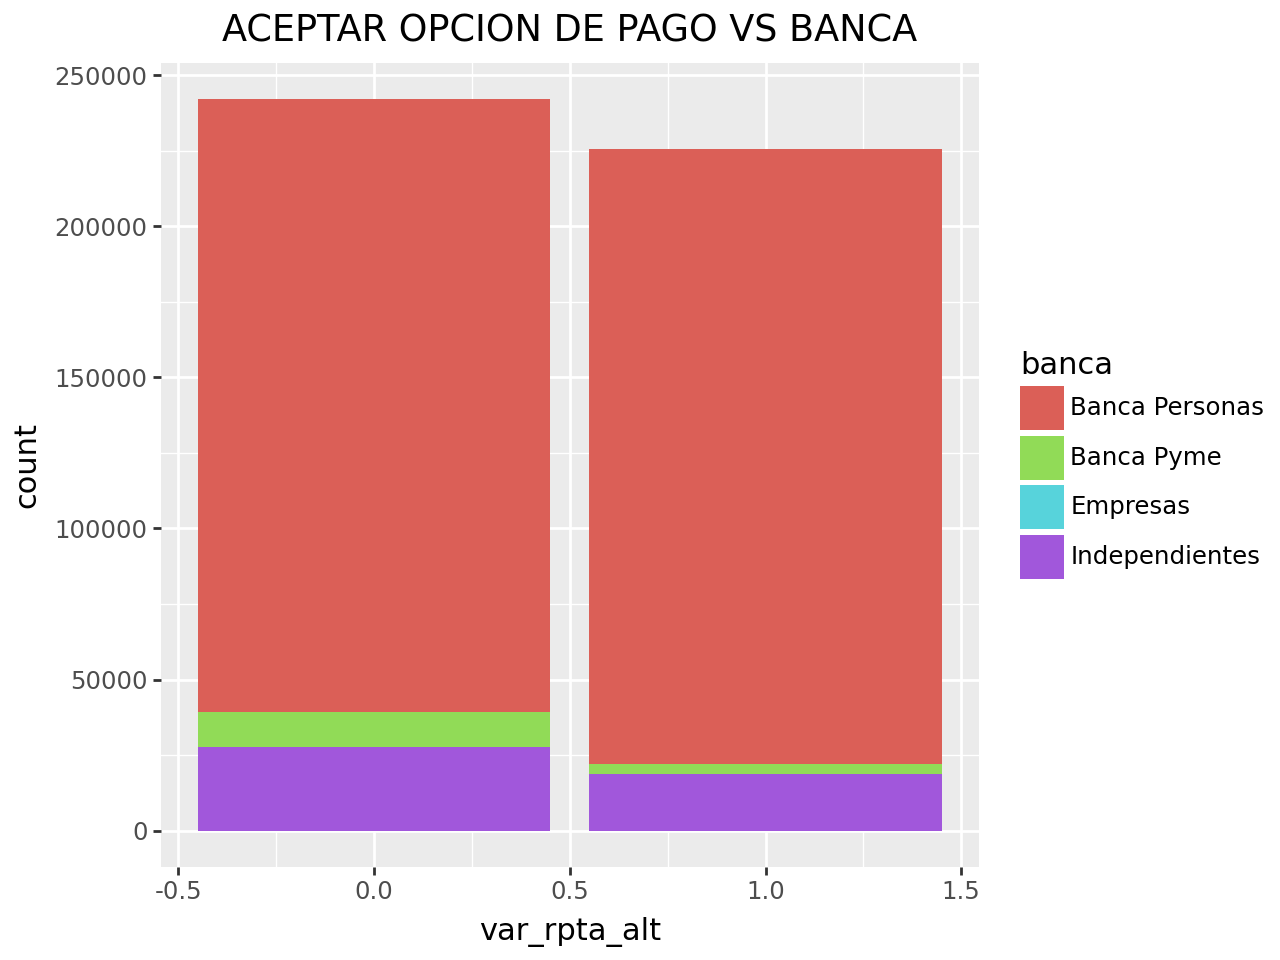

In [88]:
(
    ggplot(train_full.assign(count = 1), aes( x = 'var_rpta_alt', y = 'count', fill = 'banca')) + 
    geom_col() + 
    labs(title = "ACEPTAR OPCION DE PAGO VS BANCA")
)

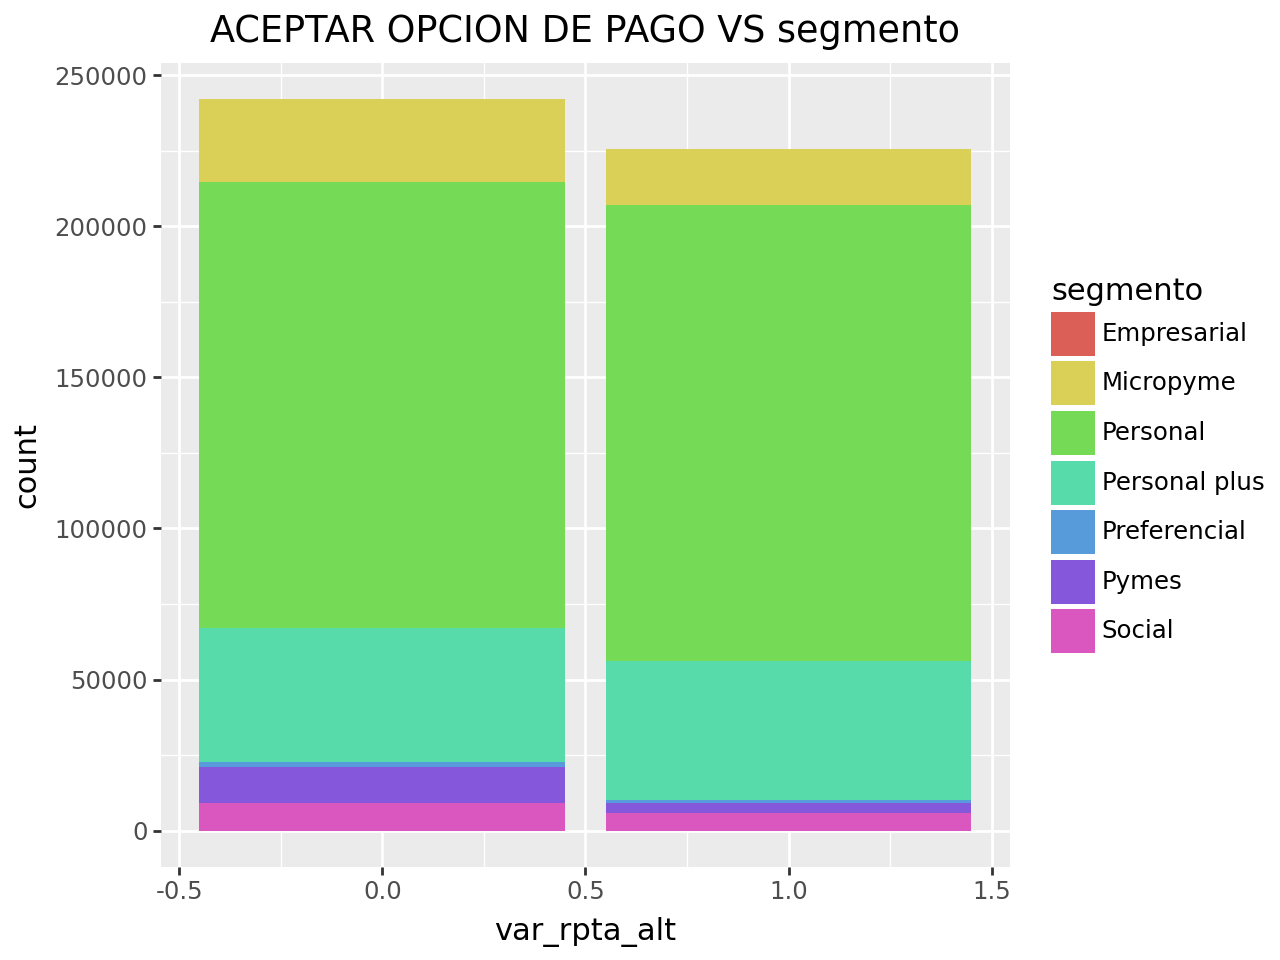

In [27]:
(
    ggplot(train_full.assign(count = 1), aes( x = 'var_rpta_alt', y = 'count', fill = 'segmento')) + 
    geom_col() + 
    labs(title = "ACEPTAR OPCION DE PAGO VS segmento")
)

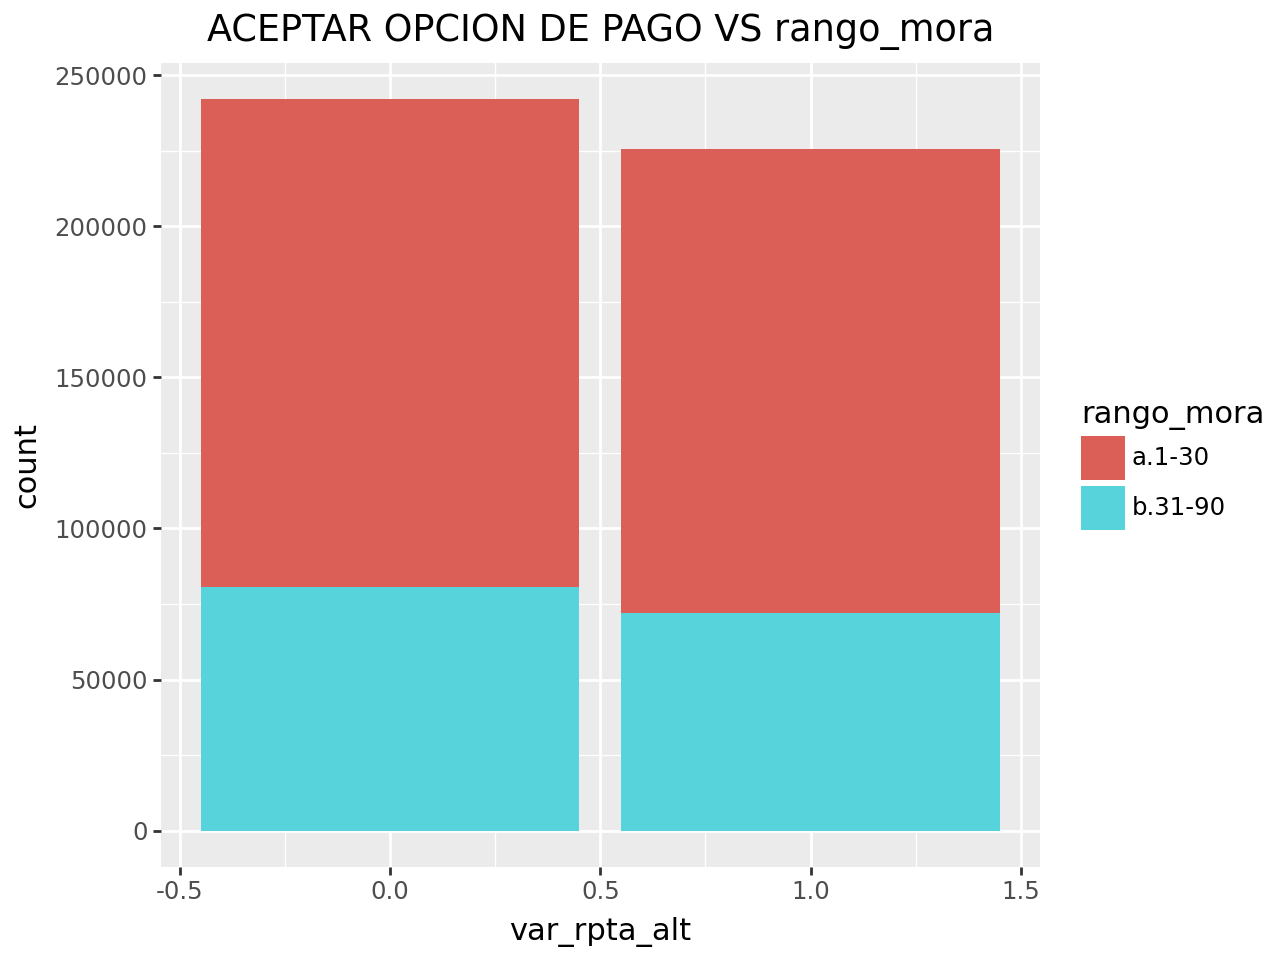

In [29]:
(
    ggplot(train_full.assign(count = 1), aes( x = 'var_rpta_alt', y = 'count', fill = 'rango_mora')) + 
    geom_col() + 
    labs(title = "ACEPTAR OPCION DE PAGO VS rango_mora")
)

- Ingisghts:
    + Vemos que no tenemos un problema de clasificación binaria con clases que no estan balanceadas.
    + Tenemos características cuantitativas y cualitativas.
    + ¿Tenemos que usar todas? No necesariamente. A lo mejor tenemos que crear otras.

# 1. Construir conjuntos de entrenamiento, validación y prueba

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import dtreeviz
from sklearn.tree import DecisionTreeClassifier
from dtreeviz import explain_prediction_path
from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import GridSearchCV
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier.threshold import DiscriminationThreshold
from sklearn.metrics import precision_score, recall_score, f1_score
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import roc_auc_score
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.classifier.threshold import DiscriminationThreshold
from yellowbrick.classifier import (
    ConfusionMatrix, ClassPredictionError, ClassificationReport,
    PrecisionRecallCurve, ROCAUC, ClassPredictionError
)
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [89]:
from yellowbrick.target import ClassBalance
from yellowbrick.target import ClassBalance
class_visualizer = ClassBalance(
	labels=["no", "yes"]			# Indicamos las etiquetas de las clases. 
									# Ten cuidado con el orden de las etiquetas.
)
class_visualizer.fit(train_full.var_rpta_alt)
class_visualizer.show(outpath="fig/profundiza/01_class_balance.png");

* train_full --> hasta Octubre para entrenar modelo 
* validation_set --> 202311 para Predecir Diciembre
* test_set --> 202312 para predecir Enero

In [90]:
train_set = train_full[train_full['fecha_var_rpta_alt']<=202310]
validation_set = train_full[train_full['fecha_var_rpta_alt']==202311]

* Verifica que los conjuntos tengan las dimensiones correctas.

In [91]:
train_set.shape, validation_set.shape, test_set.shape

((350639, 33), (117146, 33), (100466, 33))

* Verifica que en los conjuntos la variable dependiente tenga la misma distribución.

In [92]:
train_set.var_rpta_alt.value_counts(normalize=True)

var_rpta_alt
0    0.519574
1    0.480426
Name: proportion, dtype: float64

In [93]:
validation_set.var_rpta_alt.value_counts(normalize=True)

var_rpta_alt
0    0.511114
1    0.488886
Name: proportion, dtype: float64

In [94]:
test_set.var_rpta_alt.value_counts(normalize=True)

var_rpta_alt
0    0.531772
1    0.468228
Name: proportion, dtype: float64

## 1.2 Extracción de características

* Una vez que construimos nuestros conjuntos de datos, es momento de comenzar el preprocesamiento de los datos.
* Del EDA puedes concluir que los datos vienen razonablemente limpios, por lo que no se ocupó realizar grandes transformaciones.
* En esta sección comenzaremos a construir características, ya sea que agregemos las existentes, o creemos nuevas.
* No hay respuestas correcta, hay que iterar para llegar a la mejor combinación de características. 
* Aqui se muestra una propuesta de nuevas características.
* Asimismo, dado que hay que aplicar individualmente estas transformaciones a cada conjunto, creamos un conjunto de funciones que nos ayudan a simplificar esta tarea. Asegurate de leer la documentación de estas funciones para que veas que es lo que se propone.

*Se decide eliminar las columnas desc_alternativa2	desc_alternativa3 al tener demasiados valores como Sin Alivio

In [95]:
def comparar_valores_categoricos(df1, df2, df3):
    """
    Compara los valores únicos de las variables categóricas en tres DataFrames diferentes.
    
    Parámetros:
    df1, df2, df3 (pd.DataFrame): Los DataFrames que se quieren comparar.
    
    Retorna:
    dict: Un diccionario donde las claves son los nombres de las columnas categóricas
          y los valores son los conjuntos de valores únicos en cada DataFrame.
    """
    # Filtrar las columnas categóricas
    cols_categoricas = df1.select_dtypes(include=['object', 'category']).columns
    
    # Crear un diccionario con los valores únicos para cada columna categórica en los tres DataFrames
    comparacion_valores = {}
    
    for col in cols_categoricas:
        valores_df1 = set(df1[col].unique())
        valores_df2 = set(df2[col].unique())
        valores_df3 = set(df3[col].unique())
        
        comparacion_valores[col] = {
            'df1': valores_df1,
            'df2': valores_df2,
            'df3': valores_df3
        }
    
    # Mostrar los valores categóricos en paralelo para cada columna
    for col, valores in comparacion_valores.items():
        print(f"Columna: {col}")
        print(f"Valores únicos en train_set  : {valores['df1']}")
        print(f"Valores únicos en valid_set  : {valores['df2']}")
        print(f"Valores únicos en test_set_30: {valores['df3']}")
        print("-" * 40)
    
    return comparacion_valores

In [96]:
def comparar_columnas(df1, df2, df3):
    """
    Compara los valores de cada columna en tres DataFrames y detecta los valores en común y no comunes.
    
    Parámetros:
    df1, df2, df3 (pd.DataFrame): Los tres DataFrames a comparar (con las mismas columnas).
    
    Retorna:
    dict: Un diccionario donde las claves son los nombres de las columnas y los valores son otro diccionario
          con los valores comunes y no comunes.
    """
    # Inicializar un diccionario para guardar los resultados
    comparacion_valores = {}

    # Filtrar las columnas categóricas en cada DataFrame
    columnas_categoricas = df1.select_dtypes(include=['object', 'category']).columns
    
    # Iterar a través de las columnas categóricas comunes en los tres DataFrames
    columnas_comunes = columnas_categoricas.intersection(df2.columns).intersection(df3.columns)

    for col in columnas_comunes:
        # Obtener los valores únicos en cada DataFrame para la columna actual
        valores_df1 = set(df1[col].unique())
        valores_df2 = set(df2[col].unique())
        valores_df3 = set(df3[col].unique())

        # Calcular los valores en común (intersección)
        valores_comunes = valores_df1 & valores_df2 & valores_df3

        # Calcular los valores no comunes (diferencias)
        valores_no_comunes = (valores_df1 | valores_df2 | valores_df3) - valores_comunes

        # Guardar los resultados en el diccionario
        comparacion_valores[col] = {
            'valores_comunes': valores_comunes,
            'valores_no_comunes': valores_no_comunes
        }

    return comparacion_valores

In [ ]:
#train_set[train_set['desc_alternativa1']=='Ampliación de plazo Empleados']

In [ ]:
#validation_set[validation_set['desc_alternativa1']=='Ampliación de plazo Empleados']

In [ ]:
#test_set[test_set['desc_alternativa1']=='Ampliación de plazo Empleados']

* Se procede a hacer una iteracion sobre los campos categoricos que seran transformados por pd.get_duumies y tomar una desicion sobre la variable categoria si transformar la respuesta o elimianr las filas

In [34]:
#train_set.drop(train_set[train_set['banca'] == 'Empresas'].index, inplace=True)
#validation_set.drop(validation_set[validation_set['banca'] == 'Empresas'].index, inplace=True)
#Se elimina una fila dado que no genera impacto en el modelo y causa mas manualidad en el proceso
#train_set.drop(train_set[train_set['desc_alternativa1']=='Ampliación de plazo Empleados'].index, inplace=True)

C:\Users\franc\AppData\Local\Temp\ipykernel_1572\2237736602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


* Funciones para validar los valores categoricos de cada columna

In [ ]:
comparar_valores_categoricos(train_set, validation_set, test_set_30)

In [ ]:
comparacion = comparar_columnas(train_set, validation_set, test_set_30)

# Imprimir el resultado para cada columna
for col, resultado in comparacion.items():
    print(f"Columna: {col}")
    print(f"Valores comunes: {resultado['valores_comunes']}")
    print(f"Valores no comunes: {resultado['valores_no_comunes']}")
    print("-" * 40)

In [97]:
def fun_preprocess_numeric_variables(df):
    '''Regresa un data frame con las variables numéricas preprocesadas.
    
    Codificar mes como una variable numéricas
    Seleccionar el resto de las varaibles numéricas.
    
    Parameters
    ----------
    df: DataFrame
        DataFrame con los datos del banco.
        
    Returns
    -------
    DataFrame
        DataFrame con los campos numéricos preprocesados . 
    '''
 
    df_numeric = df[['min_mora',	'max_mora',	'dias_mora_fin',	'vlr_obligacion',	'vlr_vencido',	'saldo_capital',	'endeudamiento',	'cant_alter_posibles',	'cant_gestiones',	'cant_gestiones_binario',	'rpc',	'promesas_cumplidas',	'cant_promesas_cumplidas_binario',	'cant_acuerdo',	'cant_acuerdo_binario',	'valor_cuota_mes',	'pago_cuota',	'porc_pago_cuota',	'pago_mes',	'lote',	'prob_propension',	'prob_alrt_temprana',	'prob_auto_cura']]
    
    return df_numeric

def fun_preprocess_categorical_variables(df):
    '''Regresar un data frame con las variables categóricas preprocesadas.

    Convierte en dummies las variables categóricas.
    En algunos casos recodifica algunas categorías con replace.
    Para una variable categórica se elimina la primera opción con drop_first
    esto es para evitar problemas de multicolinealidad en algunos algorítmos.
    
    Parameters
    ----------
    df: DataFrame
        DataFrame con los datos del banco.
        
    Returns
    -------
    DataFrame
        DataFrame con los campos categóricos preprocesados.  
    '''

    
    df_cat = pd.get_dummies(df[[#'segmento', 'marca_alt_apli'
    'aplicativo', 'rango_mora',  'pagos_tanque',	'marca_debito_mora', 'marca_pago']], drop_first = True)
    # df_marital = pd.get_dummies(df[['marital']], drop_first = True) 'desc_alternativa1',
    
    df_banca = pd.get_dummies(
        df.banca.replace(
            {'Banca Pyme':'Banca Pyme', 'Banca Personas':'Banca Personas', 'Independientes':'Independientes',
             'Empresas':'Banca Pyme'}), 
        prefix = 'banca', 
        drop_first=True
    )
    df_segmento = pd.get_dummies(
        df.segmento.replace(
            {'Social':'Social', 'Micropyme':'Micropyme', 'Pymes':'Pymes', 'Preferencial':'Preferencial', 'Empresarial':'Pymes', 'Personal plus':'Personal plus', 'Personal':'Personal'}), 
        prefix = 'segmento', 
        drop_first=True
    )
    # df_producto = pd.get_dummies(
    #     df.producto.replace(
    #         {'TARJETAS DE CREDITO':'TARJETAS DE CREDITO', 'HIPOTECARIO VIVIENDA':'HIPOTECARIO VIVIENDA', 'CREDIPAGO':'CREDIPAGO', 'CREDIAGIL':'CREDIAGIL',
    #          'LIBRE INVERSION':'', 'ROTATIVOS':'ROTATIVOS', 'CARTERA ORDINARIA':'CARTERA ORDINARIA', 'VENTA DIGITAL':'VENTA DIGITAL',
    #           'OTROS HIPOTECARIO':'Otros', 'TESORERIA':'TESORERIA', 'CREDITOS DE CONSUMO':'CREDITOS DE CONSUMO', 'SOBREGIRO':'SOBREGIRO',
    #            'CREDITO A LA MANO':'CREDITO A LA MANO', 'CARTERA MICROCREDITO':'CARTERA MICROCREDITO', 'LEASING HABITACIONAL':'LEASING HABITACIONAL',
    #             'LIBRANZA':'LIBRANZA', 'TARJETA DE CREDITO':'TARJETAS DE CREDITO', 'LEASING':'LEASING',
    #         'CREDITO HIPOTECARIO':'HIPOTECARIO VIVIENDA', 'CUENTA CORRIENTE':'Otros', 'LIBRANZA EX EMPLEADOS':'LIBRANZA', 'REESTRUCTURADO':'Otros',
    #          'Titularizada':'Otros', 'MICROCREDITO':'CARTERA MICROCREDITO'
    #          }), 
    #     prefix = 'producto', 
    #     drop_first=True
    # ) 
    
    return pd.concat([df_segmento
    ,df_cat 
    ,df_banca
    #,df_producto
     ], axis = 1)

def fun_preprocesar_atributos(df):
    '''Regresa un DataFrame con los datos numéricos y categóricos preprocesados
    
    Parameters
    ----------
    df: DataFrame
        DataFrame con los datos del banco.
        
    Returns
    -------
    DataFrame
        DataFrame con los datos preprocesados
    '''
    df_numeric = fun_preprocess_numeric_variables(df) 
    df_categorical = fun_preprocess_categorical_variables(df)
    
    return pd.concat([df_numeric, df_categorical], axis = 1)

def fun_preprocesar_categoria(df):
    '''Regresa un numpy array con la variable dependiente
    
    Toma los datos del banco, extrae la variable dependiente,
    la convierte en una variable de dummy donde:
        1 = el cliente sí aceptó el depósito a plazo
        0 = el cliente no aceptó el depósito a plazo
        
    Asimismo, se convierten los datos a int64 y se formata el
    array para que tenga la siguiente dimensión (n, )
    
    
    Parameters
    ----------
    df: DataFrame
        DataFrame con los datos del banco.
        
    Returns
    -------
    ndarray
        Regresa un numpy array con dimensión (n, ) con la variable
        dependiente que toma valores de 1 y 0.
    '''
    
    return df.var_rpta_alt.astype('int64').values.ravel()

* Estas líneas nos sirven para validar que las columnas de los tres conjuntos de datos después de aplicar el preprocesamiento están correctas.

In [98]:
assert fun_preprocesar_atributos(train_set).columns.tolist() == fun_preprocesar_atributos(test_set).columns.tolist()
assert fun_preprocesar_atributos(train_set).columns.tolist() == fun_preprocesar_atributos(validation_set).columns.tolist()

In [99]:
# Antes
train_set.shape, validation_set.shape, test_set.shape

((350639, 33), (117146, 33), (100466, 33))

In [100]:
# Después
fun_preprocesar_atributos(train_set).shape, fun_preprocesar_atributos(validation_set).shape, fun_preprocesar_atributos(test_set).shape

((350639, 42), (117146, 42), (100466, 42))

### Particion de nuestro df a predecir al 30% de los datos como especifica la prueba:

In [101]:
import pandas as pd

def seleccionar_muestra_30(df):
    """
    Selecciona el 30% de la base de datos de forma aleatoria.
    
    Parámetros:
    df (pd.DataFrame): El DataFrame del cual se va a extraer la muestra.
    
    Retorna:
    pd.DataFrame: Un DataFrame con el 30% de las filas seleccionadas aleatoriamente.
    """
    # Seleccionar el 30% del DataFrame de forma aleatoria
    muestra_30 = df.sample(frac=0.3, random_state=42)  # random_state para reproducibilidad
    
    return muestra_30

test_set_30 = seleccionar_muestra_30(test_set) #Este df nos servira para identificar las predicciones y obtener el file final a entregar

In [102]:
X_train = fun_preprocesar_atributos(train_set)
y_train = fun_preprocesar_categoria(train_set)

X_val = fun_preprocesar_atributos(validation_set)
y_val = fun_preprocesar_categoria(validation_set)

X_test = fun_preprocesar_atributos(test_set_30)
y_test = fun_preprocesar_categoria(test_set_30)

In [103]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((350639, 42), (117146, 42), (30140, 42), (350639,), (117146,), (30140,))

# 2. Construir un flujo de trabajo para optimizar problemas de regresión 

## 2.1 Visualización de árboles

### Modelo base

- El primer paso del análisis predictivo es construir lo más inmetiado posible un pipeline que nos permita comenzar a ajustar un modelo e irlo mejorando iterativamente. Recordar que el análisis predictivo es un proceso. Rara vez el ajuste de un modelo sale a la primera vez.
- Asimismo, necesitamos establecer un punto de partida para ir mejorando el modelo.

In [104]:
from sklearn.tree import DecisionTreeClassifier
# Especificamos un modelo de árbol de decisión
clf_dt = DecisionTreeClassifier(
    max_depth = 2, 
    class_weight = 'balanced', 	# Indicamos que se deben reponderar las clases.
    random_state=seed			# Indicamos una semilla para reproducibilidad.
)
# Ajustamos el modelo y predecimos
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_val)

In [105]:
from sklearn.metrics import roc_auc_score
print(f"ROC-AUC en validación: {np.round(roc_auc_score(y_val, y_pred), 2)} ")

ROC-AUC en validación: 0.81 


Podemos utilizar una herramienta de visualización de árboles para comprender cómo el modelo hace la clasificación.

In [106]:
import dtreeviz
from sklearn.tree import DecisionTreeClassifier

# Construimos una visualización
viz = dtreeviz.trees.model(
    model= clf_dt, 
    X_train=X_train,		        # Especificamos el modelo (debe ser un estimador) 
    y_train=y_train, 				# Especificamos los datos de entrenamiento
    feature_names=X_train.columns, 	# Escpeficiamos el nombre las variables
    target_name = 'subscription', 	# Indicamos como se llama la variable de clasificación
    class_names={0:'no', 1:'yes'},  # Indicamos el nombre de las clases
    #show_node_labels=True
     			                    # Indicamos que queremos el nombre de los nodos
)
v = viz.view()    
v.show()                 
v.save("fig/profundiza/02_decision_tree.svg")

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


Es posible gráficar el árbol y tomar un cliente para entender donde es clasificado.

In [107]:
# Seleccionamos un cliente, el que sea
datos_cliente_ejemplo = X_train.iloc[28079]
datos_cliente_ejemplo

min_mora                                   4
max_mora                                  27
dias_mora_fin                             27
vlr_obligacion                      970213.0
vlr_vencido                         133638.0
saldo_capital                      873081.89
endeudamiento                       970213.0
cant_alter_posibles                        2
cant_gestiones                          16.0
cant_gestiones_binario                     1
rpc                                      1.0
promesas_cumplidas                         0
cant_promesas_cumplidas_binario            0
cant_acuerdo                             4.0
cant_acuerdo_binario                       1
valor_cuota_mes                     92176.43
pago_cuota                               0.0
porc_pago_cuota                          0.0
pago_mes                                 0.0
lote                                     2.0
prob_propension                      0.48109
prob_alrt_temprana                  0.487584
prob_auto_

In [108]:
# Construimos el árbol para explciar el camino
viz = dtreeviz.trees.model(
    model=clf_dt, 						
    X_train=X_train, 
    y_train=y_train, 				
    feature_names=X_train.columns, 	
    target_name = 'subscription', 	
    class_names={0:'no', 1:'yes'}, 		
    
    #datos_cliente_ejemplo, 
		# Damos los datos para un solo cliente
)
v = viz.view()    
v.show()                 
v.save("fig/profundiza/03_decision_tree_client_prediction.svg")


c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [109]:
from dtreeviz import explain_prediction_path
print(
    #m = dtreeviz.model(clf_dt) 
    explain_prediction_path(
        clf_dt,								# Especificamos el modelo (debe ser un estimador ajustado) 
        datos_cliente_ejemplo, 				# Proporcionamos los datos del cliente ejemplo
        feature_names=X_train.columns, 		# Proporcionamos el nombre de las variables
        explanation_type="plain_english"	# Indicamos que la explicación la queremos en palabras.
    )
)

0.5 <= dias_mora_fin 
0.5 <= marca_pago_Sin pago 



C:\Users\franc\AppData\Local\Temp\ipykernel_24228\3850500230.py:4: DeprecationWarning: explain_prediction_path() function is deprecated starting from version 2.0. 
 For the same functionality, please use this code instead: 
 m = dtreeviz.model(...) 
 m.explain_prediction_path()
c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\dtreeviz\models\shadow_decision_tree.py:335: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\dtreeviz\interpretation.py:54: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


- De esta visualización podemos concluir rapidamente que un árbole de decisión con una profundidad pequeña de árboles es muy rígida para poder encontrar en el ruido de los datos aquellos clientes que sí aceptaron.

- Veamos como le fue a este modelo, para lo cual utilizaremos dos herramientas de visualización de la librerías Yellowbrick, que sintetizan varios de los conceptos para evaluar el modelo de clasificación. Vamos a utilizar la matriz de confusión y el classification report.

## 2.2 Regularización árboles

### Curvas de validación

In [57]:
from yellowbrick.model_selection import ValidationCurve

# Especificamos un modelo de árbol de decisión
clf_dt = DecisionTreeClassifier(
    max_depth = 4, 
    class_weight = 'balanced', 	# Indicamos que se deben reponderar las clases.
    random_state=seed			# Indicamos una semilla para reproducibilidad.
)

# Especificamos la curva de validación
viz = ValidationCurve(
    clf_dt, 							# Especificar el modelo (debe ser un estiamdor)
    param_name="max_depth",				# Especificar un solo hiperparámetro a evaluar
    param_range=[3, 5, 7, 11, 13, 17, 	# Dara una lista o numpy.array con los valores probar
    			23, 29, 31, 37, 41, 
    			43, 47, 51, 53], 
    cv=5, 								# Indicar el valor k, para construir la validación cruzada
    scoring="roc_auc",					# Indicar la métrica de evaluación para el modelo.
    n_jobs=-1							# Indicar cuántos CPUs utilizar para paralelizar el trabajo.
    									# n_jobs=-1, signfica utilizar todos los CPUs disponibles.
)
# Ajustamos el modelo y la visualización
viz.fit(X_train, y_train)
# Imprimimos en la pantalla la visualización.
viz.show(outpath="fig/profundiza/04_curva_validacion_max_depth.png");

In [58]:
viz = ValidationCurve(
    clf_dt, 							
    param_name="min_samples_leaf",		# Probamos con un nuevo hiperparámetro 
    param_range=[1, 10, 20, 30, 40,		# Especificamos una lista con los nuevos
    			50, 60, 70, 80, 90,		# valores. 
    			100, 150, 200, 250, 
    			300, 350, 400, 450, 
    			500], 
    cv=5, 
    scoring="roc_auc",
    n_jobs=-1
)
# Ajustamos el modelo y la visualización
viz.fit(X_train, y_train)
# Imprimimos en la pantalla la visualización.
viz.show(outpath="fig/profundiza/05_curva_validacion_min_samples_leaf.png");

In [59]:
viz = ValidationCurve(
    clf_dt, 							
    param_name="min_samples_split",		# Probamos con un nuevo hiperparámetro 
    param_range=[1, 10, 20, 30, 40,		# Especificamos una lista con los nuevos
    			50, 60, 70, 80, 90,		# valores. 
    			100, 150, 200, 250, 
    			300, 350, 400, 450, 
    			500], 
    cv=5, 
    scoring="roc_auc",
    n_jobs=-1
)
# Ajustamos el modelo y la visualización
viz.fit(X_train, y_train)
# Imprimimos en la pantalla la visualización.
viz.show(outpath="fig/profundiza/05_curva_validacion_min_samples_split.png");

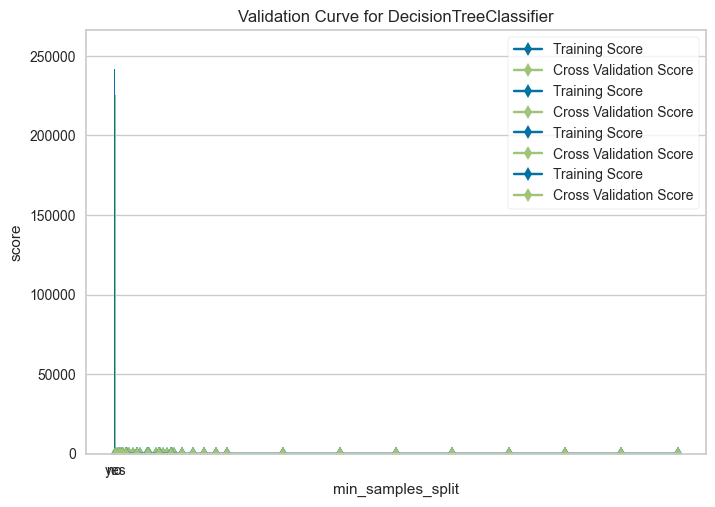

In [60]:
#Especificamos un modelo de árbol de decisión
clf_dt = DecisionTreeClassifier(
   max_depth = 7, 
   min_samples_split= 2,
   class_weight = 'balanced', 	# Indicamos que se deben reponderar las clases.
   random_state=seed			# Indicamos una semilla para reproducibilidad.
)

# Especificamos la curva de validación
viz = ValidationCurve(
   clf_dt, 							# Especificar el modelo (debe ser un estiamdor)
   param_name="min_samples_split",				# Especificar un solo hiperparámetro a evaluar
   param_range= [2,4,6,8,10,20,30,40,50], 
   cv=5, 								# Indicar el valor k, para construir la validación cruzada
   scoring="roc_auc",					# Indicar la métrica de evaluación para el modelo.
   n_jobs=-1							# Indicar cuántos CPUs utilizar para paralelizar el trabajo.
   									# n_jobs=-1, signfica utilizar todos los CPUs disponibles.
)
# Ajustamos el modelo y la visualización
viz.fit(X_train, y_train)
# Imprimimos en la pantalla la visualización.
viz.show();

## 2.3 Exploración de hiperparámetros y selección del mejor modelo. 

- La pregunta es cómo seleccionamos el parámetro óptimo para la profundidad de un árbol `max_depth`.
- Para seleccionar hiper parámetros debemos hacer varias iteraciones y evaluar en el conjunto de prueba.

### Búsqueda de hiperparámetros

In [110]:
from sklearn.model_selection import GridSearchCV
# Especificamos un modelo de árbol de decisión
clf_dt = DecisionTreeClassifier(
    class_weight = 'balanced', 	# Indicamos que se deben reponderar las clases.
    random_state=seed			# Indicamos una semilla para reproducibilidad.
)

# Especificar diccionario de parámteros y valores a explorar
params = {
    'max_depth':[5, 10, 50, 100, 150, 200],
    'min_samples_split':[2, 4, 6, 8],
    'min_samples_leaf':[1, 2, 4, 5]
}
# Especificar opciones del Grid Search 
grid_search = GridSearchCV(
    clf_dt, 				# Indicar el modelo (debe ser un estimador).
    scoring = 'roc_auc', 	# Indicar la métrica para evaluar el desempeño del
    						# modelo en validación cruzada.
    param_grid=params, 		# Indicar el diccionario de parámetros y valores
    cv = 10, 				# Indicar los k cortes de validación cruzada.
    return_train_score=True,# Agregar el error de entrenamiento
    n_jobs = -1				# Indicar cuántos CPUs utilizar para paralelizar el 
    						# trabajo.

) 
# Entrenar los modelos
grid_search.fit(X_train, y_train)

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=20210610),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 50, 100, 150, 200],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 4, 6, 8]},
             return_train_score=True, scoring='roc_auc')

Podemos recuperar los resultados de la búsqueda de parámetros, utilizando el atributo de `cv_results_` y la función auxiliar de `fun_plot_grid_search_results` para visualizarlos. 

In [111]:
def fun_plot_grid_search_results(df):   
    '''Regresa un DataFrame con los resultados de la exploración de hiperparámetros.

    Esta función muestra una tabla estilizada con los resultados de la exploración de
    hiper parámetros utilizando validación cruzada.
    
    En la tabla aparecen del lado izquierdo la combinación de hiperparámetros, el error
    de entrenamiento y el error de validación cruzada y el ranking del mejor modelo
    a partir del error de validación.
    
    El mapa de color va de azul (modelos con menor error) a rojo (modelos con mayor error).
    Se calcula para el error de entrenamiento y validación de manera separada.
    
    Los resultados están ordenados de mejor a peor modelo, en función del error de validación.
    
    Parameters
    ----------
    dict: Diccionario con los resultados de la búsqueda de hiperparámetros GridSearchCV.cv_results_ 
        
    Returns
    -------
    pandas.io.formats.style.Styler
        Regresa una tabla estilizada con los resultados de la búsqueda de hiperparámetros.
    '''
    # Elegir paleta divergente de colores
    cm = sns.diverging_palette(5, 250, as_cmap=True)
    
    return (
        pd.concat([
            # Limpiar la columna de parámetros
            df['params'].apply(pd.Series), 
            # Extraer solamente el error de prueba 
            df[['mean_train_score', 'mean_test_score', 'rank_test_score']]],
            axis = 1
        )
        # Ordenar los modelos de mejor a peor
        .sort_values(by = 'rank_test_score')
        # Pintar el fondo de la celda a partir del error de validación
        .style.background_gradient(cmap=cm, subset = ['mean_train_score', 'mean_test_score'])
    )

In [112]:
# Recupearar los resultados de la validación cruzada
df_best_params = pd.DataFrame(grid_search.cv_results_)
tabla_resultados = fun_plot_grid_search_results(df_best_params)
tabla_resultados

,max_depth,min_samples_leaf,min_samples_split,mean_train_score,mean_test_score,rank_test_score
31,10,5,8,0.936138,0.932568,1
30,10,5,6,0.936138,0.932568,1
29,10,5,4,0.936138,0.932568,1
28,10,5,2,0.936138,0.932568,1
27,10,4,8,0.936167,0.932472,5
26,10,4,6,0.936167,0.932472,5
25,10,4,4,0.936167,0.932472,5
24,10,4,2,0.936167,0.932472,5
23,10,2,8,0.936172,0.932271,9
22,10,2,6,0.936206,0.932156,10


### Selección del mejor modelo

In [113]:
def fun_resumen_grid_search(grid_search):
    '''Imprime un resumen del grid search.
    
    Imprime el número de modelos que se entrenaron y 
    devuelve los hiperparámetros del mejor modelo.
    
    Parameters
    ----------
    grid_search (GridSearchCV): Fitted GridSearch con los resultados.
    '''
    best_params = grid_search.best_params_
    print("\nSe evaluaron {} modelos utilizando el grid search.".format(pd.DataFrame(grid_search.cv_results_).shape[0]))
    print("\nLos hiperparámetros del mejor modelo son: " + str(best_params) + "\n")

In [114]:
# Recuepar los resultados de la validación cruzada.
fun_resumen_grid_search(grid_search)


Se evaluaron 96 modelos utilizando el grid search.

Los hiperparámetros del mejor modelo son: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}



In [115]:
# Recuperar el estimador del mejor modelo.
best_model = grid_search.best_estimator_

### Predicciones

In [116]:
# Utilizar el mejor modelo para predecir la clase 
y_pred = best_model.predict(X_val)
# Mostrar las clases de los primeros 20 clientes
y_pred[:20]

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [117]:
# Utilizar el mejor modelo para predecir la probabilidad.
y_pred_proba = best_model.predict_proba(X_val)[:,1]
# Mostrar las probabilidades de los primeros 20 clientes
y_pred_proba[:20]

array([0.99969688, 0.94151932, 0.08897604, 0.82557922, 0.05379116,
       0.63375054, 0.22394456, 0.22394456, 0.08897604, 1.        ,
       0.83727509, 0.01685045, 0.33728099, 1.        , 0.95490291,
       0.33728099, 0.08897604, 0.03196872, 0.90298578, 0.13674006])

In [118]:
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, random_state=20210610)

In [119]:
y_pred = best_model.predict(X_val)
y_pred_proba = best_model.predict_proba(X_val)[:,1]

In [ ]:
y_pred_202401 = best_model.predict(X_test)
y_pred_proba_202401 = best_model.predict_proba(X_test)[:,1]


In [122]:
test_set_30['y_pred'] = y_pred_202401
test_set_30['y_prob'] = y_pred_proba_202401
test_set_30 = test_set_30[['nit_key','y_pred','y_prob']]
test_set_30

C:\Users\franc\AppData\Local\Temp\ipykernel_24228\3786913760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\franc\AppData\Local\Temp\ipykernel_24228\3786913760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,nit_key,y_pred,y_prob
187689,346132#687461#392881,0,0.474762
77800,388987#335563#745022,1,0.999971
426421,344484#772228#308114,1,1.000000
410940,569701#366624#713233,1,0.995375
159130,528256#384543#695315,1,0.996649
...,...,...,...
127486,287580#982835#97507,0,0.141668
481760,38958#241099#841922,0,0.191472
426826,535132#412015#667903,0,0.223945
189624,407514#517138#563204,0,0.290309


In [164]:
test_set_30 = test_set_30.rename(columns={'nit_key':'ID','y_pred':'var_rpta_alt','y_prob':'Prob_uno'})
test_set_30.to_csv(r'resultado_prueba.csv', index=False, encoding='utf-8', sep=",")

# 3. Evaluación de ajuste 

## 3.1 Graficar la calidad del ajuste

### Errores de clasificación y matriz de confusión.

Visualizamos los errores de predicción de clases utilizando una gráfica de distribución de clases.

In [124]:
from yellowbrick.classifier import ClassPredictionError
# Creamos la figura
fig, ax = plt.subplots(figsize = (7,6))
cpe_viz = ClassPredictionError(
    best_model,					# Pasar el estimador del mejor modelo que 
    							# se obtiene de la validación cruzada.  
    classes = ['no', 'yes']		# Indicar las etiquetas de las clases.
    							# Cuidado con el orden de los nombres.
)
# Ajustamos la visualización a los datos de entrenamiento
cpe_viz.fit(X_train, y_train)
# Evaluamos los errores en la predicción utilizando los datos de validación.
cpe_viz.score(X_test, y_test)
# Dibjuamos la visualización.
cpe_viz.show(outpath="fig/profundiza/07_error_clasificacion.png");

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


Visualizamos la misma información pero ahora en forma de una matriz de confusión.

In [125]:
from yellowbrick.classifier import ConfusionMatrix
fig, ax = plt.subplots(figsize = (5,5))
# Creamos la matrix de confusión
cm = ConfusionMatrix(
    best_model, 				# Pasar el estimador del mejor modelo que 
    							# se obtiene de la validación cruzada. 
    classes=['no', 'yes']		# Indicar las etiquetas de las clases.
    							# Cuidado con el orden de los nombres.
)
# Ajustamos la visualización a los datos de entrenamiento
cm.fit(X_train, y_train)
# Evaluamos los errores en la predicción utilizando los datos de validación.
cm.score(X_test, y_test)
# Dibjuamos la visualización.
cm.show(outpath="fig/profundiza/08_matriz_confusion.png");

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [127]:
# Matriz de confusión implementación de Sklearn
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_202401)

array([[14796,  1273],
       [ 3448, 10623]])

- Idealmente lo que buscamos es que todos los valores de la matriz de confusión se encuentren en la diagonal de Verdaderos Positivos y Verdaderos Negativos.
- Este modelo nos muestra que todos los clientes que sí aceptaron el producto, el modelo los clasificó como que no aceptaron el producto. Es decir nuestro modelo no clasificó bien.

## 3.2 Selección del punto de corte para problemas de clasificación binaria 

Visualizamos cómo cambia la precision y el recall para distintos puntos de corte con nuesto modelo.

In [128]:
from yellowbrick.classifier.threshold import DiscriminationThreshold
# Especificamos la gráfica
visualizer = DiscriminationThreshold(
	best_model,							# Pasar el estimador del mejor modelo que 
    									# se obtiene de la validación cruzada. 
	exclude = ["queue_rate"]			# Excluimos de la gráfica algunas métricas
)
# Ajustamos la visualización a los datos de entrenamiento
visualizer.fit(X_val, y_val)
# Dibjuamos la visualización.
visualizer.show(outpath="fig/profundiza/09_discrimination_threshold.png");  

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


In [129]:
# Clasificar con un punto de corte más alto que 0.5
def fun_predict_with_threshold(model, threshold = 0.5):
    '''Predice la clase del cliente utilizando un threshold
    
    Permite predecir la clase de un cliente utilizando otros 
    puntos de corte (threshold) que sean diferentes a 0.5.
    
    Parameters
    ----------
    model: Fitted estimator
    threshold (float): Punto de corte entre 0 y 1.
        
    Returns
    -------
    ndarray:
        Regresa un numpy array con el valor de la clase 0 ó 1
    '''
    return np.where( model.predict_proba(X_test)[:,1] < threshold, 0, 1 )

In [130]:
# Calcular clases con un punto de corte en 0.75
y_pred_075 = fun_predict_with_threshold(best_model, threshold = 0.75)
# Mostrar primeros 20 clientes
y_pred_075[:20]

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

### Reporte de clasificación, recall, precision y f1-score

Calculamos las métricas de evaluación utilizando los métodos de sklearn.

In [131]:
from sklearn.metrics import precision_score, recall_score, f1_score
def fun_imprimir_metricas_de_evaluacion(y_true, y_pred):
    '''Imprimer los resultados de precision, recall y f1 score
    
    Implementa las métricas de precision, recall y f1 score de
    sklearn para la categoría 1= sí acepta el depósito a plazo.
    
    Parameters
    ----------
    y_true (ndarray): Array con las clases actuales 
    y_pred (ndarray): Array con las clases predichas 
    '''
    print("precision_score: {}".format(np.round(precision_score(y_true, y_pred), 3)))
    print("recall_score: {}".format(np.round(recall_score(y_true, y_pred), 3)))
    print("f1_score: {}".format(np.round(f1_score(y_true, y_pred), 3)))

In [132]:
fun_imprimir_metricas_de_evaluacion(y_test, y_pred_202401)

precision_score: 0.893
recall_score: 0.755
f1_score: 0.818


Ahora probamos lo mismo utilizando las visualizaciones de Yellowbrick.

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


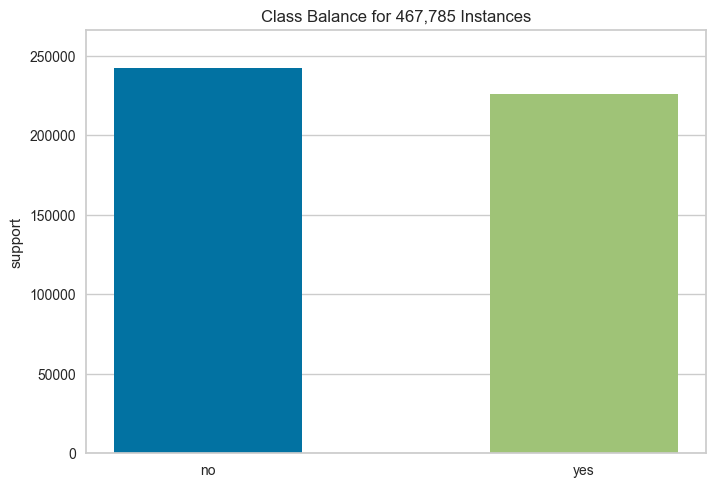

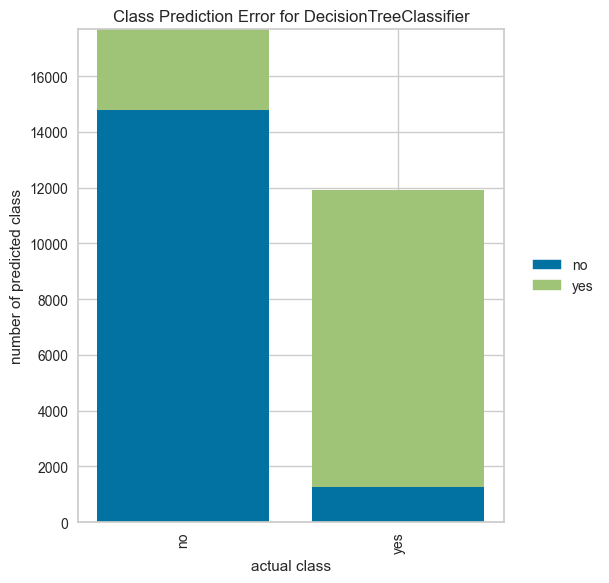

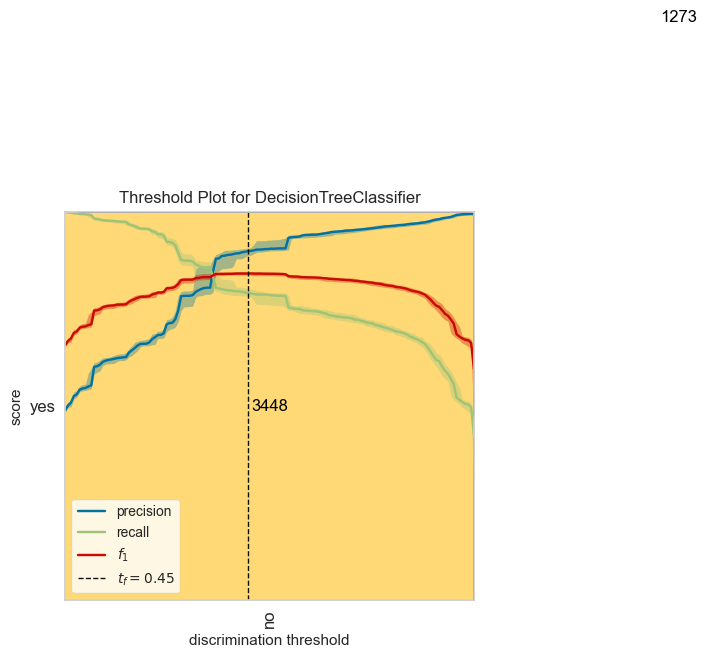

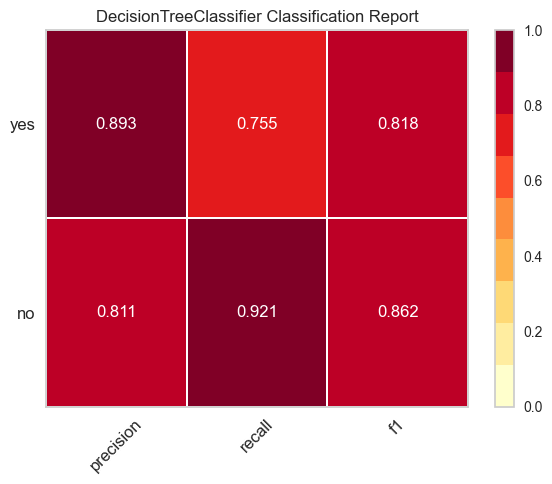

In [133]:
from yellowbrick.classifier import ClassificationReport
fig, ax = plt.subplots(figsize = (6,5))
visualizer = ClassificationReport(
    best_model,					# Pasar el estimador del mejor modelo que 
    							# se obtiene de la validación cruzada. 
    classes=['no', 'yes']		# Indicar las etiquetas de las clases.
    							# Cuidado con el orden de los nombres.
)
# Ajustamos la visualización a los datos de entrenamiento
visualizer.fit(X_train, y_train)
# Evaluamos los errores en la predicción utilizando los datos de validación.
visualizer.score(X_test, y_test)
# Dibjuamos la visualización.
visualizer.show();

- En esta visualización vemos medidas de calidad de la clasificación del modelo. Vemos la precisión y el recall y el F1-score. Para cada una de las categorías.
- Idealmente buscamos que estas medidas sean altas. Esta visualización en forma de matriz y mapa de calor es útil porque un buen modelo sería aquel en el que ambas categorías sean igualmente rojas. 
- Dado que el primer modelo que hicimos no clasificó a nadie en la categoría de Sí acepto el producto, entonces las medidas de precisión, recall y F1 score tienen valor cero. 

### Curva de precision y recall

Visualizamos el trade-off de la precision y recall.

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


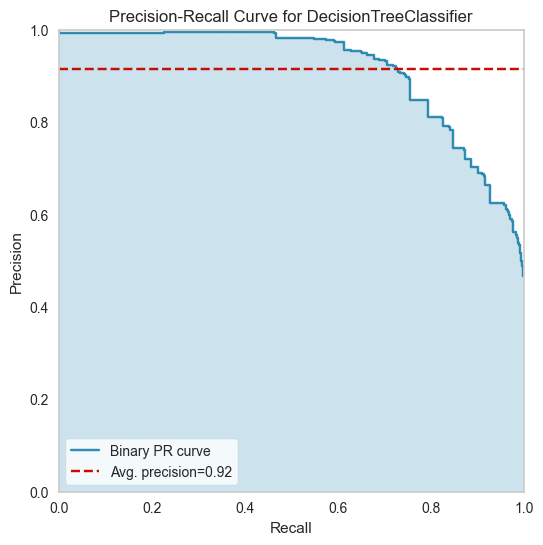

In [134]:
from yellowbrick.classifier import PrecisionRecallCurve
# Especificamos la curva de precision y recall
fig, ax = plt.subplots(figsize = (6,6))
viz = PrecisionRecallCurve(best_model) 			# Pasamos el estimado del mejor modelo
												# que obtuvimos con validación cruzada.
# Ajustamos la visualización con los 
# datos de entrenamiento
viz.fit(X_train, y_train)
# Evaluamos con los datos de prueba
viz.score(X_test, y_test)
# Dibujamos la visualización
viz.show();

### Curva ROC y AUC score

Creamos la curva ROC AUC para visualizar el trade off de recall y specificity.

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


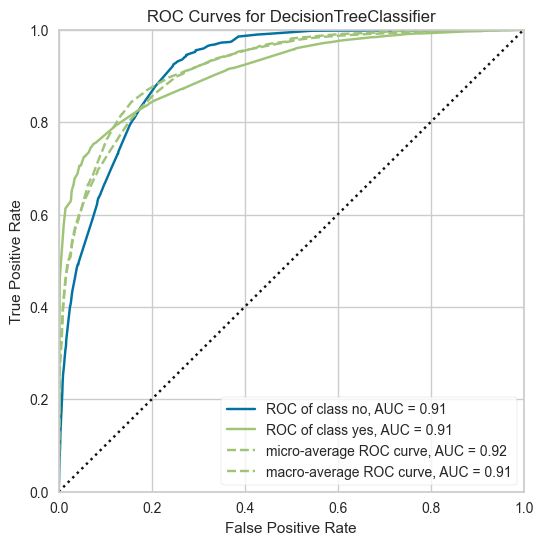

In [135]:
from yellowbrick.classifier import ROCAUC
# Especificamos la curva ROC AUC
fig, ax = plt.subplots(figsize = (6,6))
roc_curves_visualizer = ROCAUC(
    best_model,					# Pasar el estimador del mejor modelo que 
    							# se obtiene de la validación cruzada.  
    classes=['no', 'yes']		# Indicar las etiquetas de las clases.
    							# Cuidado con el orden de los nombres.
)
# Ajustamos la visualización a los datos de entrenamiento
roc_curves_visualizer.fit(X_train, y_train)
# Evaluamos los errores en la predicción utilizando los datos de validación.
roc_curves_visualizer.score(X_test, y_test) 
# Dibjuamos la visualización.
roc_curves_visualizer.show();

In [139]:
from sklearn.metrics import roc_auc_score
# Implementación de las métricas con sklearn
print("roc_auc_score: {}".format(np.round(roc_auc_score(y_test, y_pred_202401), 3)))

roc_auc_score: 0.838


## 3.3 Visualizar la importancia de características (Feature Importances) 

Exploramos cuáles son las variables que tienen una mayor importancia.

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


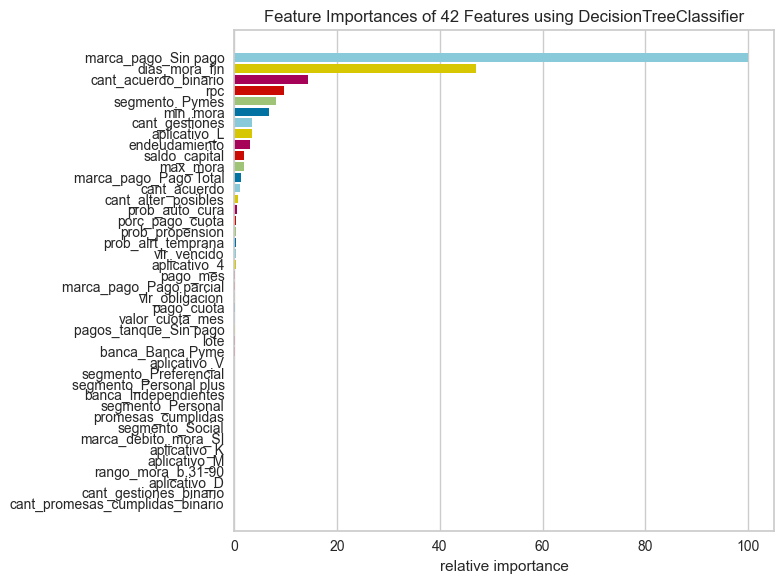

In [140]:
from yellowbrick.model_selection import FeatureImportances
# Especificamos la gráfica
fig, ax = plt.subplots(figsize = (8,6))
viz = FeatureImportances(best_model) 	# Pasar el estimador del mejor modelo que 
    									# se obtiene de la validación cruzada.
# Ajustamos la visualización a los datos de entrenamiento
viz.fit(X_train, y_train)
# Dibjuamos la visualización.
viz.show();

# 4. Evaluación de otros modelos

- Vemos que nuestro árbol de decisión para clasificar gente que aceptó el producto, lo mejor que puede hacer es X.
- ¿Habrá otro modelo que se desempeñe mejor?
- Intentemos con un modelo de árboles más complejo, un Bosque Aleatorio, y aprovechemos el código que ha hicimos para validar hiperparámetros. 
- Lo único que tenemos que hacer es adaptar el diccionario de hiperparámetros a este nuevo modelo.
- Para evaluar nuestros modelos una buena práctica sería convertir todas las visualizaciones que hicimos arriaba en funciones para no escribir tanto código.

In [141]:
from yellowbrick.classifier.threshold import DiscriminationThreshold
from yellowbrick.classifier import (
    ConfusionMatrix, ClassPredictionError, ClassificationReport,
    PrecisionRecallCurve, ROCAUC, ClassPredictionError
)
from yellowbrick.model_selection import FeatureImportances

def fun_graficar_matriz_confusion(model, X_val_test, y_val_test):
    '''Graficar matriz de confusión
    
    Parameters
    ----------
    model (Estimator): Fitted estimator
    X_test (DataFrame): Predictores del conjunto de validación o prueba.
    y_test (ndarray): Clases del conjunto de validación o prueba.
    ''' 
    fig, ax = plt.subplots(figsize = (5,5))
    cm = ConfusionMatrix(
        model,
        classes=['no', 'yes']
    )
    cm.fit(X_train, y_train)
    cm.score(X_val_test, y_val_test)
    cm.show();
    
def fun_graficar_reporte_clasificacion(model, X_val_test, y_val_test):
    '''Graficar reporte de clasificación
    
    Parameters
    ----------
    model (Estimator): Fitted estimator
    X_test (DataFrame): Predictores del conjunto de validación o prueba.
    y_test (ndarray): Clases del conjunto de validación o prueba.
    '''   
    fig, ax = plt.subplots(figsize = (6,5))
    visualizer = ClassificationReport(
        model,
        classes=['no', 'yes']
    )
    visualizer.fit(X_train, y_train)
    visualizer.score(X_val_test, y_val_test)
    visualizer.show();  
    
def fun_graficar_curva_precision_recall(model, X_val_test, y_val_test):
    '''Graficar curva de precision y recall
    
    Parameters
    ----------
    model (Estimator): Fitted estimator
    X_test (DataFrame): Predictores del conjunto de validación o prueba.
    y_test (ndarray): Clases del conjunto de validación o prueba.
    '''
    fig, ax = plt.subplots(figsize = (6,6))
    viz = PrecisionRecallCurve(model)
    viz.fit(X_train, y_train)
    viz.score(X_val_test, y_val_test)
    viz.show();
    
def fun_graficar_curva_roc(model, X_val_test, y_val_test):
    '''Graficar curva ROC
    
    Parameters
    ----------
    model (Estimator): Fitted estimator
    X_test (DataFrame): Predictores del conjunto de validación o prueba.
    y_test (ndarray): Clases del conjunto de validación o prueba.
    '''
    fig, ax = plt.subplots(figsize = (6,6))
    roc_curves_visualizer = ROCAUC(
        model,
        classes=['no', 'yes']
    )
    roc_curves_visualizer.fit(X_train, y_train)
    roc_curves_visualizer.score(X_val, y_val) 
    roc_curves_visualizer.show();
    
def fun_imprimir_roc_auc_score(model, X_val_test, y_val_test):
    '''Imprime el ROC AUC score
    
    Parameters
    ----------
    model (Estimator): Fitted estimator de un DecisionTree, Random Forest o xgboost.
    X_val_test (DataFrame): Clases actuales
    y_val_test (ndarray): Probabildades de clase
    '''
    print(
        "roc_auc_score: {}".format(
            np.round(roc_auc_score(y_val_test, model.predict_proba(X_val_test)[:,1]), 3)
        )
    )
    
def fun_graficar_error_clasificacion(model, X_val_test, y_val_test):
    '''Graficar error de clasificación
    
    Parameters
    ----------
    model (Estimator): Fitted estimator
    X_test (DataFrame): Predictores del conjunto de validación o prueba.
    y_test (ndarray): Clases del conjunto de validación o prueba.
    '''
    fig, ax = plt.subplots(figsize = (7,6))
    cpe_viz = ClassPredictionError(model, classes = ['no', 'yes'])
    cpe_viz.fit(X_train, y_train)
    cpe_viz.score(X_val_test, y_val_test)
    cpe_viz.show();

def fun_graficar_importancias(model):
    '''Graficar importancia de características
    
    Parameters
    ----------
    model (Estimator): Fitted estimator de un DecisionTree, Random Forest o xgboost.
    '''
    fig, ax = plt.subplots(figsize = (8,6))
    viz = FeatureImportances(model)
    viz.fit(X_train, y_train)
    viz.show();
    
def fun_graficar_discrimination_threshold(model, X_val_test, y_val_test):
    '''Graficar relación de precision y recall con distintos puntos de corte
    
    Parameters
    ----------
    model (Estimator): Fitted estimator de un DecisionTree, Random Forest o xgboost.
    X_val_test (DataFrame): Clases actuales
    y_val_test (ndarray): Probabildades de clase
    '''
    fig, ax = plt.subplots(figsize = (8,6))
    visualizer = DiscriminationThreshold(
        model,
        exclude = ["queue_rate"]
    )
    visualizer.fit(X_val_test, y_val_test)
    visualizer.show();     

## 4.1 Random Forest

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Especificar bosque aleatorio
clf_rf = RandomForestClassifier(
    random_state = seed, 
    class_weight = 'balanced'
)
# Especificar la combinación de parámetros
# que queremos explroar.
#params = {
#    'n_estimators':[50, 100, 150, 200],
#    'max_depth':[5, 10, 25, 50],
#    'min_samples_split':[2, 4, 6, 8],
#    'min_samples_leaf':[1, 2, 4, 5]
#}

params = {
    'n_estimators':[200],
    'max_depth':[50],
    'min_samples_split':[8],
    'min_samples_leaf':[2]
}
# Especificar el GridSearch con validación cruzada
grid_search = GridSearchCV(
    clf_rf,					# Especificar el modelo (estimador)
    params, 				# Especificar los parámetros de la malla
    scoring = 'roc_auc', 	# Especificar la métrica de evaluación
    cv = 10, 				# Especificar los k-cortes de la validación cruzada
    return_train_score=True,# Agregar el error de entrenamiento
    n_jobs=-1				# Especificar el número de CPUs -1= todos los disponibles
)
# Entrenar los modelos
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=20210610),
             n_jobs=-1,
             param_grid={'max_depth': [50], 'min_samples_leaf': [2],
                         'min_samples_split': [8], 'n_estimators': [200]},
             return_train_score=True, scoring='roc_auc')

In [143]:
# Recupearar los resultados de la validación cruzada
df_best_params = pd.DataFrame(grid_search.cv_results_)
tabla_resultados = fun_plot_grid_search_results(df_best_params)
tabla_resultados

,max_depth,min_samples_leaf,min_samples_split,n_estimators,mean_train_score,mean_test_score,rank_test_score
0,50,2,8,200,0.997327,0.955178,1


In [144]:
# Recuepar los resultados de la validación cruzada.
fun_resumen_grid_search(grid_search)


Se evaluaron 1 modelos utilizando el grid search.

Los hiperparámetros del mejor modelo son: {'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 200}



In [145]:
# Recuperar el estimador del mejor modelo.
best_model_rf = grid_search.best_estimator_

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


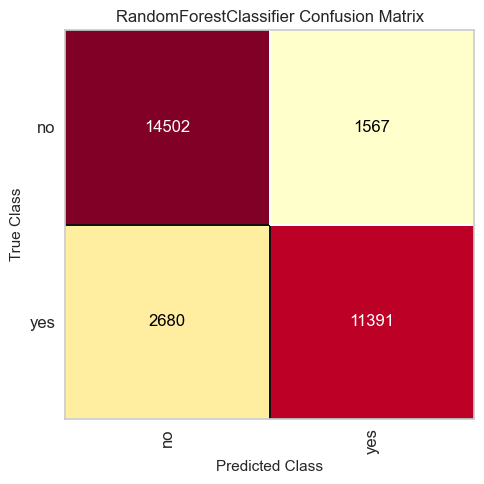

In [146]:
# Graficar matriz de confusión
fun_graficar_matriz_confusion(best_model_rf, X_test, y_test)

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


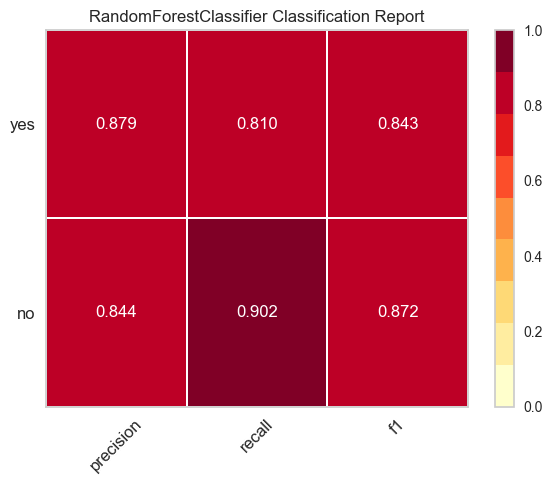

In [147]:
# Graficar reporte de clasificación
fun_graficar_reporte_clasificacion(best_model_rf, X_test, y_test)

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


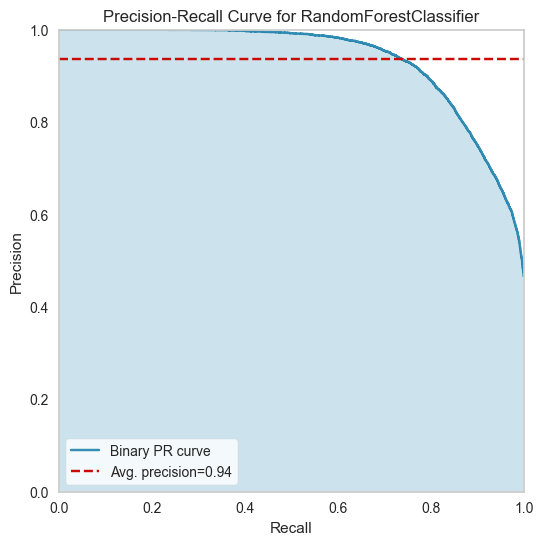

In [148]:
# Graficar curva de precision y recall
fun_graficar_curva_precision_recall(best_model_rf, X_test, y_test)   

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


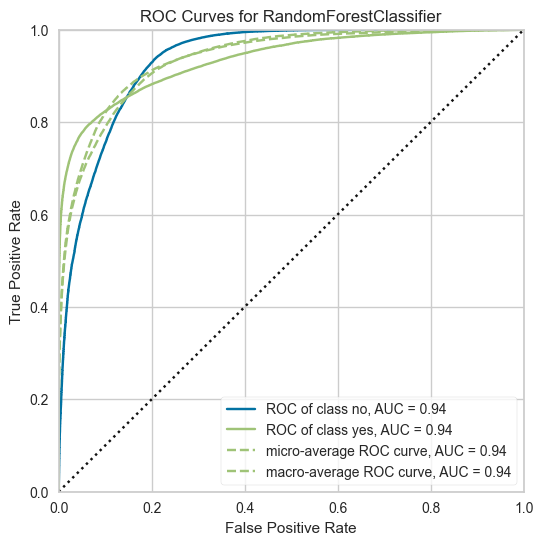

In [149]:
# Graficar curva ROC
fun_graficar_curva_roc(best_model_rf, X_test, y_test)

In [150]:
# Imprimir el ROC AUC score
fun_imprimir_roc_auc_score(best_model_rf, X_test, y_test)

roc_auc_score: 0.929


c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


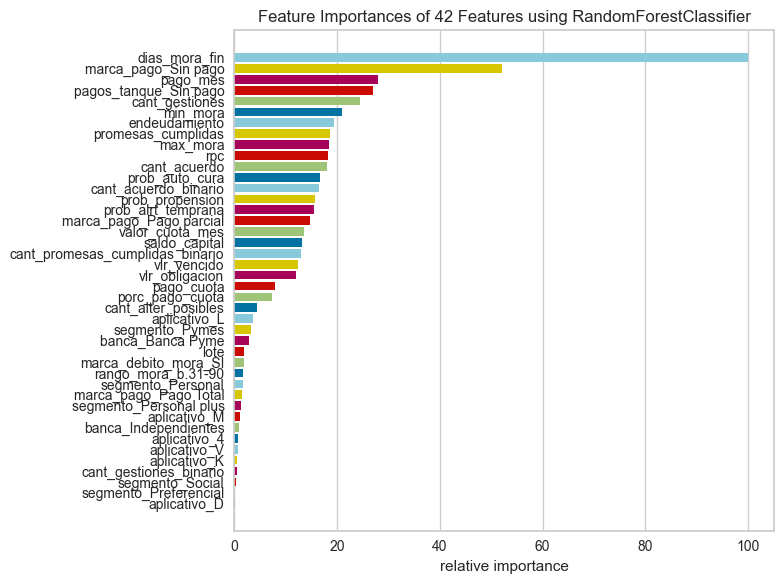

In [151]:
# Graficar importancia de características
fun_graficar_importancias(best_model_rf)

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


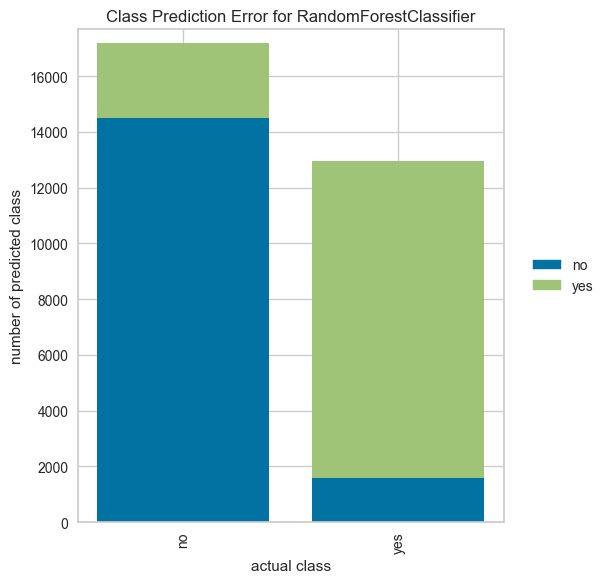

In [152]:
# Graficar error de clasificación
fun_graficar_error_clasificacion(best_model_rf, X_test, y_test)

## 4.2 Xgboost

In [153]:
import xgboost as xgb
# Especificamos el modelo 
# (Ojo, este algorítmo usa otros nombres para los parámetros)
clf_xgb = xgb.XGBClassifier(
    objective='binary:logistic',		# Para un problema de clasificación binaria
    eval_metric='auc',					# Métrica de evaluación
    scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1]),
    									# scale_pos_weight es el parámetro para 
    									# reponderar las categorías con desbalance.
    use_label_encoder=False,			# Hay que indicar esta opción
    random_state=seed					# Fijar semilla para reproducibilidad
)
# Especificar los parámetros a explorar
#params = {
#    'n_estimators':[50, 100, 150, 200],
#    'learning_rate':[.01, .001],
#    'max_depth':[5, 10, 25, 50],
#    'subsample':[0.25, 0.50, 0.75],
#    'colsample_bytree':[0.25, 0.50, 0.75],
#    'colsample_bylevel':[0.25, 0.50, 0.75],
#    'reg_lambda':[0.01, 10, 100, 150, 200]
#}

params = {
    'n_estimators':[150],
    'learning_rate':[.01],
    'max_depth':[10],
    'subsample':[0.75],
    'colsample_bytree':[0.75],
    'colsample_bylevel':[0.75],
    'reg_lambda':[0.01]
}

grid_search = RandomizedSearchCV(
	clf_xgb,					# Especificar el modelo (estimador) 
	params,						# Especificar los parámetros de la malla 
	scoring = 'roc_auc', 		# Especificar la métrica de evaluación
	cv = 10,					# Especificar los k-cortes de la validación cruzada 
	n_iter=100,					# Especificar número de modelos a explorar aleatoriamente 
    return_train_score=True,# Agregar el error de entrenamiento
	n_jobs=-1					# Especificar el número de CPUs para paralelizar el trabajo
    							# -1= todos los disponibles
)
# Entrenar los modelos
grid_search.fit(X_train, y_train)

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\franc\anaconda3\envs\myenv\lib\site-packa

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_ra...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=20210610, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bylevel': [0.75],
                                        'colsample_bytree': [0.75],
                                        'learning_rate': [0.01],
                                        'max_depth': [10],
                                        'n_estimators': [150],
                                        'reg_lambda': [0.01],
                                        'subsample': [0.75]},
                   return_train_score=True, scoring='roc_auc')

In [154]:
# Recupearar los resultados de la validación cruzada
df_best_params = pd.DataFrame(grid_search.cv_results_)
tabla_resultados = fun_plot_grid_search_results(df_best_params)
tabla_resultados

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\pandas\io\formats\style.py:3807: RuntimeWarning: All-NaN slice encountered
c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\pandas\io\formats\style.py:3808: RuntimeWarning: All-NaN slice encountered


,subsample,reg_lambda,n_estimators,max_depth,learning_rate,colsample_bytree,colsample_bylevel,mean_train_score,mean_test_score,rank_test_score
0,0.750000,0.010000,150.000000,10.000000,0.010000,0.750000,0.750000,nan,nan,1


In [155]:
# Recuepar los resultados de la validación cruzada.
fun_resumen_grid_search(grid_search)


Se evaluaron 1 modelos utilizando el grid search.

Los hiperparámetros del mejor modelo son: {'subsample': 0.75, 'reg_lambda': 0.01, 'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.75, 'colsample_bylevel': 0.75}



In [156]:
# Recuperar el estimador del mejor modelo.
best_model_xgb = grid_search.best_estimator_

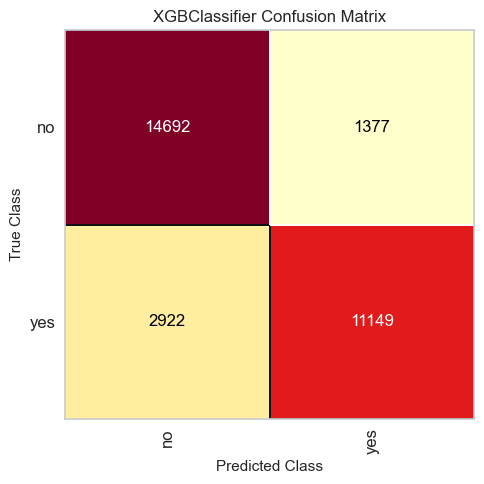

In [157]:
# Graficar matriz de confusión
fun_graficar_matriz_confusion(best_model_xgb, X_test, y_test)

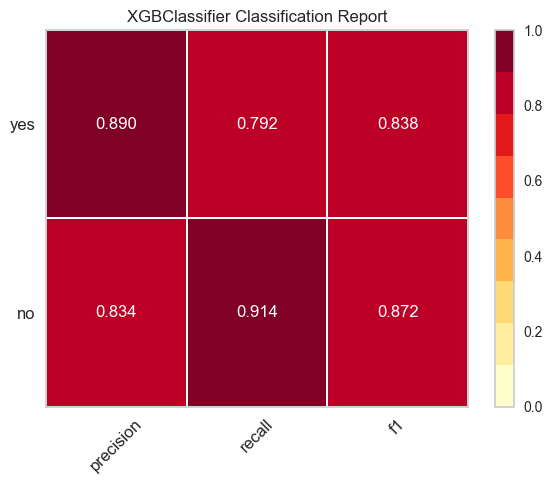

In [158]:
# Graficar reporte de clasificación
fun_graficar_reporte_clasificacion(best_model_xgb, X_test, y_test)

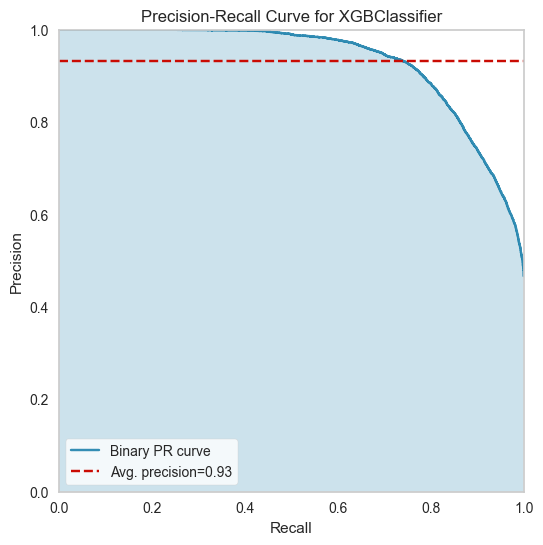

In [159]:
# Graficar curva de precision y recall
fun_graficar_curva_precision_recall(best_model_xgb, X_test, y_test)

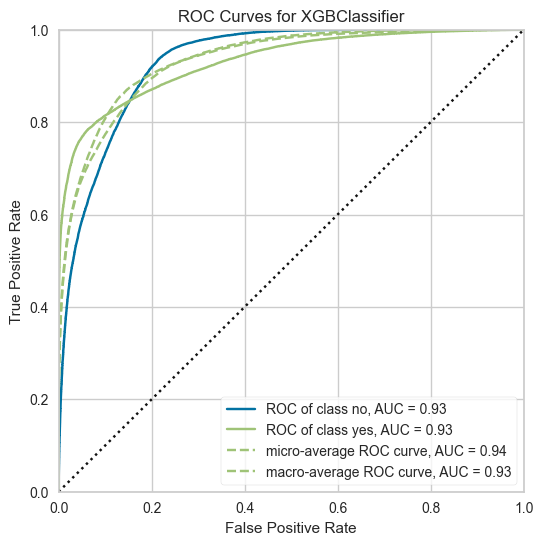

In [160]:
# Graficar curva ROC AUC
fun_graficar_curva_roc(best_model_xgb, X_test, y_test)

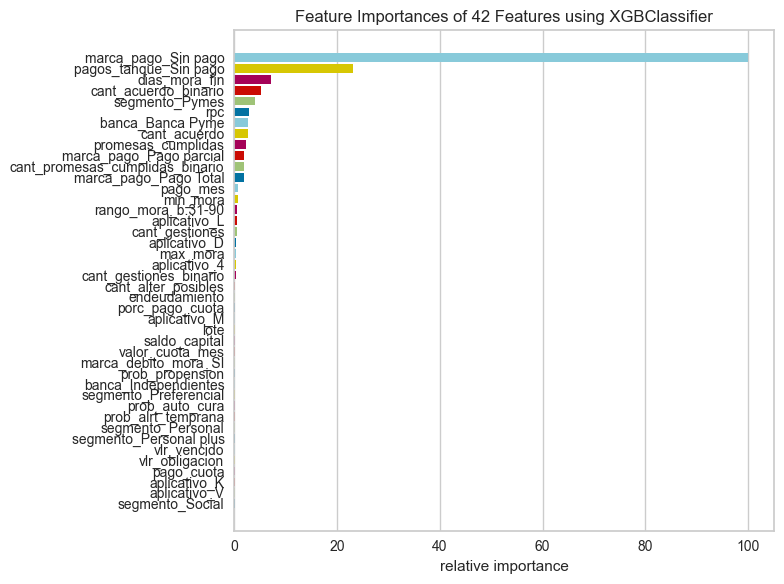

In [161]:
# Graficar importancia de características
fun_graficar_importancias(best_model_xgb)

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


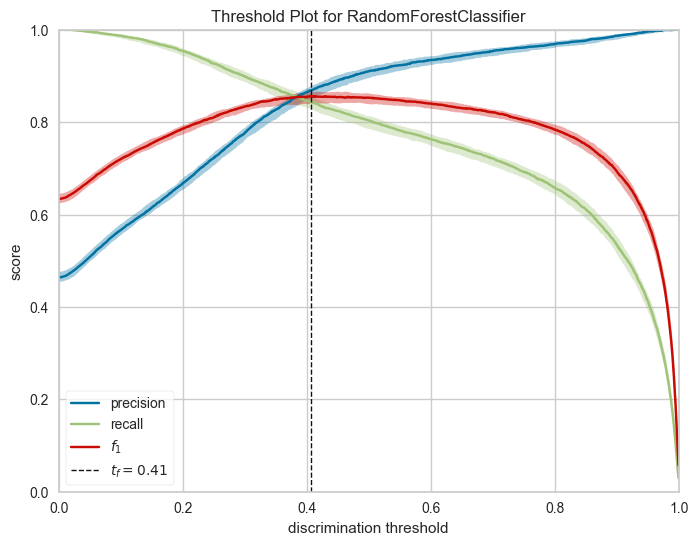

In [162]:
# Graficar curva de discriminación del punto de corte.
fun_graficar_discrimination_threshold(best_model_rf, X_test, y_test)

c:\Users\franc\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names


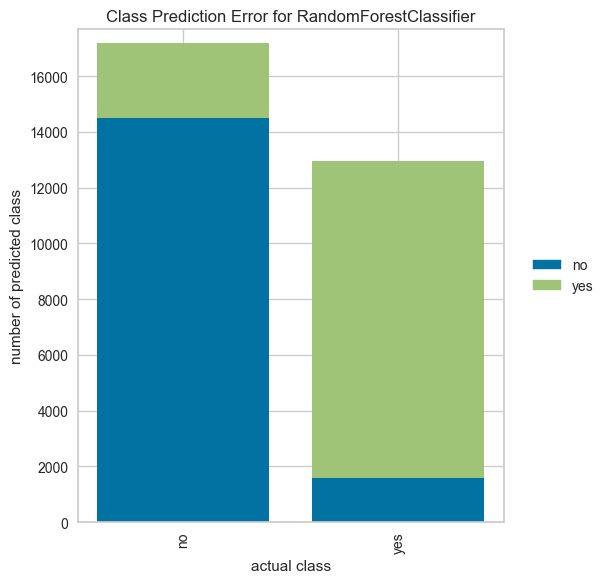

In [163]:
# Graficar error de clasificación
fun_graficar_error_clasificacion(best_model_rf, X_test, y_test)